In [1]:
## Imports all data analysis packages
import numpy as np
import pandas as pd
import glob
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors
import random

## Needed to perform Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


## This is needed to be able to view the visualizations in the current cell
%matplotlib inline

In [2]:
group_one = []
group_two = []
group_three = []
for files in glob.glob("/Users/jasonmora/Desktop/GDM Kimball Project/GDM Science Runs Kimball/*", recursive = True):
    
    
    if 'Run 1' in str(files.split("/")[6][:6]) or 'Run 2' in str(files.split("/")[6][:6]) or 'Run 3' in str(files.split("/")[6][:6]) or 'Run 4' in str(files.split("/")[6][:6]):
        group_one.append(str(files))
        
    if 'Run 5' in str(files.split("/")[6][:6]) or 'Run 6' in str(files.split("/")[6][:6]):
        group_two.append(str(files))
        
    if 'Run 8' in files:
        group_three.append(str(files))

In [6]:
# Sorts and prints the file pathts for group one
group_one.sort()
group_one

['/Users/jasonmora/Desktop/GDM Kimball Project/GDM Science Runs Kimball/Run 1 (2016-06-24)',
 '/Users/jasonmora/Desktop/GDM Kimball Project/GDM Science Runs Kimball/Run 2 (2016-07-07)',
 '/Users/jasonmora/Desktop/GDM Kimball Project/GDM Science Runs Kimball/Run 3 (2016-08-09)',
 '/Users/jasonmora/Desktop/GDM Kimball Project/GDM Science Runs Kimball/Run 4 (2016-08-11)']

In [7]:
# Sorts and prints the file paths for group two
group_two.sort()
group_two

['/Users/jasonmora/Desktop/GDM Kimball Project/GDM Science Runs Kimball/Run 5 (2017-04-20)',
 '/Users/jasonmora/Desktop/GDM Kimball Project/GDM Science Runs Kimball/Run 6 and 7 (2017-04-24) use only runs 1 and 3']

In [8]:
## NOTE: Dont need to sort for group three since it contains only one path file
group_three

['/Users/jasonmora/Desktop/GDM Kimball Project/GDM Science Runs Kimball/Run 8 and 9 (2017-05-10) use only runs 2 and 3']

In [9]:
## Creaitng a list that will consist of the runs that will have the stored files
runs = ['Run ' + str(index) for index in [1,2,3,4,5,6,8]]
runs

['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5', 'Run 6', 'Run 8']

### The following three blocks of codes are a way to generate a dictionary that has keys of particular run numbers (i.e. Run 1) and is ampped to the associated files that belong to that run.
##### NOTE: Each group has a particular subset of the datset

In [10]:
group_One_Runs = {}
temp_files = []

for run in group_one:
    for files in glob.glob(run + "/fitresults/*.xls", recursive = True):
        if run in files:
            temp_files.append(files)
            
    group_One_Runs[run.split("/")[6][:5]] = temp_files
    temp_files = []

In [11]:
group_Two_Runs = {}
temp_files = []

for run in group_two:
    for files in glob.glob(run + "/fitresults/*.xls", recursive = True):
        if run in files:
            temp_files.append(files)
            
    group_Two_Runs[run.split("/")[6][:5]] = temp_files
    temp_files = []

In [12]:
group_Three_Runs = {}
temp_files = []

for run in group_three:
    for files in glob.glob(run + "/fitresults/*.xls", recursive = True):
        if run in files:
            temp_files.append(files)
            
    group_Three_Runs[run.split("/")[6][:5]] = temp_files
    temp_files = []

In [13]:
def dataFrame(file):
    
    ## Reads an excel file and will convert into a dataframe for non-labeled dataset
    ## NOTE: header = None makes it so that it doesn't read the first line as a header for the clumn names
    dF = pd.read_excel(file, header = None)


    ## Creating a string that will label the of the coumns for the dataframe
    col_names = "r runc rweight gyromagRatioRatio Omega87 Sigma87 Omega85 Sigma85 f0 f1 a0 a1 \[Gamma]0 \[Gamma]1 \[Phi]0 \[Phi]1 slope b f0 f1 a0 a1 \[Gamma]0 \[Gamma]1 \[Phi]0 \[Phi]1 slope b f0 f a0 a1 \[Gamma]0 \[Gamma]1 \[Phi]0 \[Phi]1 slope b f0 f a0 a1 \[Gamma]0 \[Gamma]1 \[Phi]0 \[Phi]1 slope b"

    ## Assigns the names for each column
    ## NOTE. .split(" ") takes any string and creates a list from this with a space-delimeter
    dF.columns = col_names.split(" ")


    ## Takes the important sections of the data and stores them in a variable called 'data' for further analysis 
    ## These columns are important as requested by Dr. Kimball to analyze
    data = dF["gyromagRatioRatio Omega87 Sigma87 Omega85 Sigma85".split(" ")]
    
    return data

In [14]:
def filtered_dataFrame(file):
    
    ## Reads an excel file and will convert into a dataframe for non-labeled dataset
    ## NOTE: header = None makes it so that it doesn't read the first line as a header for the clumn names
    dF = pd.read_excel(file, header = None)


    ## Creating a string that will label the of the coumns for the dataframe
    col_names = "r runc rweight gyromagRatioRatio Omega87 Sigma87 Omega85 Sigma85 f0 f1 a0 a1 \[Gamma]0 \[Gamma]1 \[Phi]0 \[Phi]1 slope b f0 f1 a0 a1 \[Gamma]0 \[Gamma]1 \[Phi]0 \[Phi]1 slope b f0 f a0 a1 \[Gamma]0 \[Gamma]1 \[Phi]0 \[Phi]1 slope b f0 f a0 a1 \[Gamma]0 \[Gamma]1 \[Phi]0 \[Phi]1 slope b"

    ## Assigns the names for each column
    ## NOTE. .split(" ") takes any string and creates a list from this with a space-delimeter
    dF.columns = col_names.split(" ")


    ## Takes the important sections of the data and stores them in a variable called 'data' for further analysis 
    ## These columns are important as requested by Dr. Kimball to analyze
    data = dF["gyromagRatioRatio Omega87 Sigma87 Omega85 Sigma85".split(" ")]


    ## We will first analyaze the data using the criteria mentioned in (2)
    ## After applying the criteria, we simply just added the .idex function to see what iterations of the data are left
    ## Saves all these indices in a variable named: filtData
    ratio_Data = data['gyromagRatioRatio'][(data['gyromagRatioRatio'] > data['gyromagRatioRatio'].mean() - 2 * data['gyromagRatioRatio'].std()) & 
    (data['gyromagRatioRatio'] < data['gyromagRatioRatio'].mean() + 2 * data['gyromagRatioRatio'].std())].index
    
    return data.iloc[ratio_Data]

The following 4 cells of code do the following:
<br>
<br>
Given a set of variables, V = {$B^{+}_{LHC}$ , $B^{-}_{LHC}$ , $B^{+}_{RHC}$ , $B^{-}_{RHC}$},
dictionaries of Data Frames will be created from each variable $v \in V$ such that will contain all of the measurements for each run $r_{i} \in R$ = {Run$_{1}$, Run$_{2}$, Run$_{3}$, Run$_{4}$, Run$_{5}$}.
Each run $r_{i}$ will contain a dictionary with the ratio $\frac{\Omega_{87}}{\Omega_{85}}$, The uncertainties respectively for $\Omega_{87}$ and $\Omega_{85}$ and the respective measurements.
<br>
<br>
The next few blocks of code will generate all of the dataframes for the variables mentioned above, but this will add another layer of complexity by adding the group that the runs belong to.

In [15]:
## Generates the Data Frames for Group 1 (raw data)
## Contains data for Runs 1,2,3, & 4

raw_neg_RHC_DF_G_One = {}
frame_list = []

for run in runs[:4]:
    for files in group_One_Runs[run]:
        if "neg RHC" in files:
            frame_list.append(dataFrame(files))
    raw_neg_RHC_DF_G_One[run] = pd.concat(frame_list, ignore_index = True)
    frame_list = []
    
    
    
raw_neg_LHC_DF_G_One = {}
frame_list = []

for run in runs[:4]:
    for files in group_One_Runs[run]:
        if "neg LHC" in files:
            frame_list.append(dataFrame(files))
    raw_neg_LHC_DF_G_One[run] = pd.concat(frame_list, ignore_index = True)
    frame_list = []
    
    
raw_pos_RHC_DF_G_One = {}
frame_list = []

for run in runs[:4]:
    for files in group_One_Runs[run]:
        if "pos RHC" in files:
            frame_list.append(dataFrame(files))
    raw_pos_RHC_DF_G_One[run] = pd.concat(frame_list, ignore_index = True)
    frame_list = []
    
    
raw_pos_LHC_DF_G_One = {}
frame_list = []

for run in runs[:4]:
    for files in group_One_Runs[run]:
        if "pos LHC" in files:
            frame_list.append(dataFrame(files))
    raw_pos_LHC_DF_G_One[run] = pd.concat(frame_list, ignore_index = True)
    frame_list = []

In [16]:
## Generates the Data Frames for Group 2 (raw data)
## Contains data for Runs 5, 6, & 7

raw_neg_RHC_DF_G_Two = {}
frame_list = []

for run in runs[4:6]:
    for files in group_Two_Runs[run]:
        if "neg RHC" in files:
            frame_list.append(dataFrame(files))
    raw_neg_RHC_DF_G_Two[run] = pd.concat(frame_list, ignore_index = True)
    frame_list = []
    
    
    
raw_neg_LHC_DF_G_Two = {}
frame_list = []

for run in runs[4:6]:
    for files in group_Two_Runs[run]:
        if "neg LHC" in files:
            frame_list.append(dataFrame(files))
    raw_neg_LHC_DF_G_Two[run] = pd.concat(frame_list, ignore_index = True)
    frame_list = []
    
    
raw_pos_RHC_DF_G_Two = {}
frame_list = []

for run in runs[4:6]:
    for files in group_Two_Runs[run]:
        if "pos RHC" in files:
            frame_list.append(dataFrame(files))
    raw_pos_RHC_DF_G_Two[run] = pd.concat(frame_list, ignore_index = True)
    frame_list = []
    
    
raw_pos_LHC_DF_G_Two = {}
frame_list = []

for run in runs[4:6]:
    for files in group_Two_Runs[run]:
        if "pos LHC" in files:
            frame_list.append(dataFrame(files))
    raw_pos_LHC_DF_G_Two[run] = pd.concat(frame_list, ignore_index = True)
    frame_list = []

In [17]:
## Generates the Data Frames for Group 3 (raw data)
## Contains data for Runs 8 & 9

raw_neg_RHC_DF_G_Three = {}
frame_list = []

for run in runs[6:]:
    for files in group_Three_Runs[run]:
        if "neg RHC" in files:
            frame_list.append(dataFrame(files))
    raw_neg_RHC_DF_G_Three[run] = pd.concat(frame_list, ignore_index = True)
    frame_list = []
    
    
    
raw_neg_LHC_DF_G_Three = {}
frame_list = []

for run in runs[6:]:
    for files in group_Three_Runs[run]:
        if "neg LHC" in files:
            frame_list.append(dataFrame(files))
    raw_neg_LHC_DF_G_Three[run] = pd.concat(frame_list, ignore_index = True)
    frame_list = []
    
    
raw_pos_RHC_DF_G_Three = {}
frame_list = []

for run in runs[6:]:
    for files in group_Three_Runs[run]:
        if "pos RHC" in files:
            frame_list.append(dataFrame(files))
    raw_pos_RHC_DF_G_Three[run] = pd.concat(frame_list, ignore_index = True)
    frame_list = []
    
    
raw_pos_LHC_DF_G_Three = {}
frame_list = []

for run in runs[6:]:
    for files in group_Three_Runs[run]:
        if "pos LHC" in files:
            frame_list.append(dataFrame(files))
    raw_pos_LHC_DF_G_Three[run] = pd.concat(frame_list, ignore_index = True)
    frame_list = []

## Analysis 1:
<br>
The first two figures are scatter plots of $\ \Omega_{85}$ vs $\ \Omega_{87}$ with the $B^{+}$ and $B^{-}$ respectively. From these figures there are two major observations:

- We can observe that there is a linear relation with between Runs 1, 2, 3, and 4.
- There is a subset of the data that is noisy below this 'by inspection' linear relation.

The question bears where the is the noise coming from? To answer that we can visually see that Runs 3 & 4 are the two datasets that contribute the noise between Runs 1,2,3,& 4. One thing to note is by inspection we can observe that the major contribution of the noise seems to come from the negative magnetic field.
<br>


# PLOT FOR PAPER

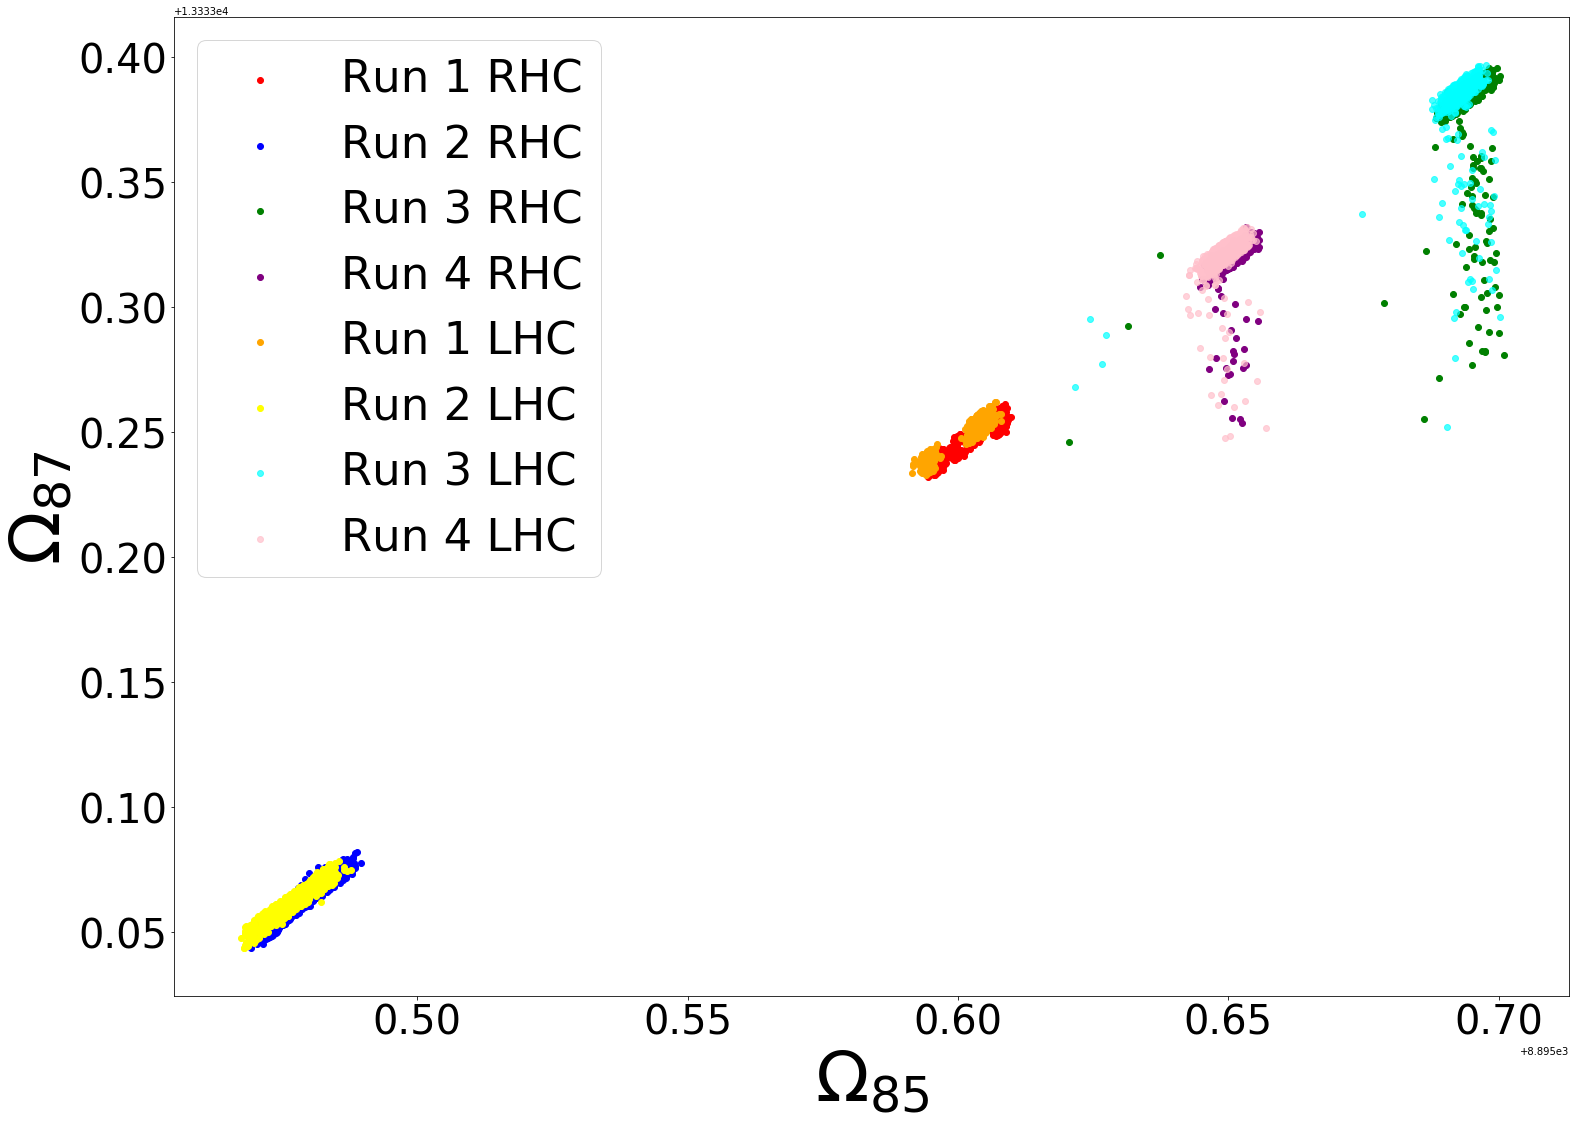

In [18]:
plt.figure(figsize = (25,18))

plt.scatter(raw_pos_RHC_DF_G_One['Run 1']['Omega85'], raw_pos_RHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 RHC', color = 'red')
plt.scatter(raw_pos_RHC_DF_G_One['Run 2']['Omega85'], raw_pos_RHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 RHC', color = 'blue')
plt.scatter(raw_pos_RHC_DF_G_One['Run 3']['Omega85'], raw_pos_RHC_DF_G_One['Run 3']['Omega87'], label = 'Run 3 RHC', color = 'green')
plt.scatter(raw_pos_RHC_DF_G_One['Run 4']['Omega85'], raw_pos_RHC_DF_G_One['Run 4']['Omega87'], label = 'Run 4 RHC', color = 'purple')


plt.scatter(raw_pos_LHC_DF_G_One['Run 1']['Omega85'], raw_pos_LHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 LHC', color = 'orange')
plt.scatter(raw_pos_LHC_DF_G_One['Run 2']['Omega85'], raw_pos_LHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 LHC', color = 'yellow')
plt.scatter(raw_pos_LHC_DF_G_One['Run 3']['Omega85'], raw_pos_LHC_DF_G_One['Run 3']['Omega87'], label = 'Run 3 LHC', alpha = .7, color = 'cyan')
plt.scatter(raw_pos_LHC_DF_G_One['Run 4']['Omega85'], raw_pos_LHC_DF_G_One['Run 4']['Omega87'], label = 'Run 4 LHC', alpha = .7, color = 'pink')


plt.xlabel("$\Omega_{85}$", size = 70)
plt.ylabel("$\Omega_{87}$", size = 70)
plt.xticks(size = 40)
plt.yticks(size = 40)
plt.legend(loc = 'upper left', prop = {'size': 45})

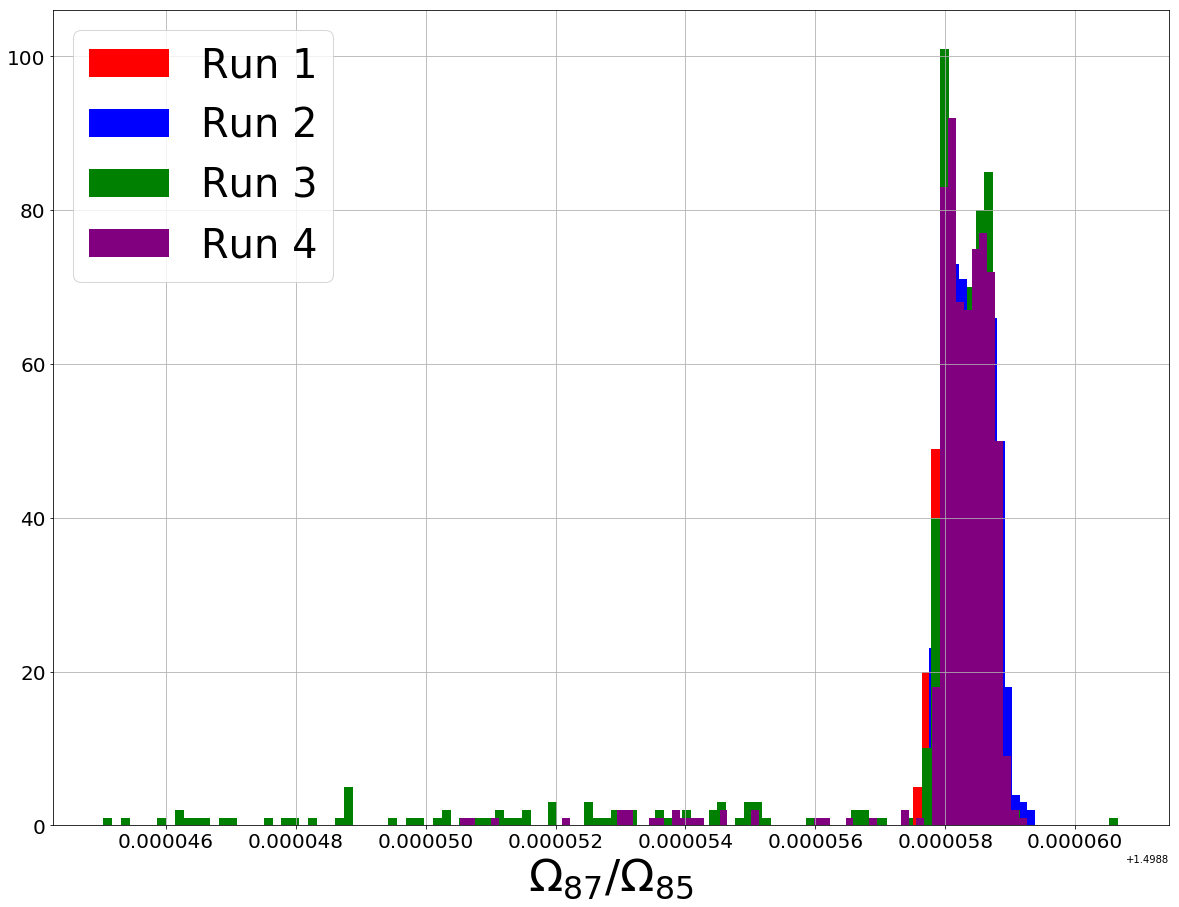

In [19]:
plt.figure(figsize= (20,15))
(raw_pos_RHC_DF_G_One['Run 1']['Omega87'] / raw_pos_RHC_DF_G_One['Run 1']['Omega85']).hist(bins = 'auto', alpha = 1, label = "Run 1", color = 'red')
(raw_pos_RHC_DF_G_One['Run 2']['Omega87'] / raw_pos_RHC_DF_G_One['Run 2']['Omega85']).hist(bins = 'auto', alpha = 1, label = "Run 2", color = 'blue')
(raw_pos_RHC_DF_G_One['Run 3']['Omega87'] / raw_pos_RHC_DF_G_One['Run 3']['Omega85']).hist(bins = 'auto', alpha = 1, label = "Run 3", color = 'green')
(raw_pos_RHC_DF_G_One['Run 4']['Omega87'] / raw_pos_RHC_DF_G_One['Run 4']['Omega85']).hist(bins = 'auto', alpha = 1, label = "Run 4", color = 'purple')

plt.legend(loc = 'upper left', prop = {'size': 40})
plt.xlabel("$\Omega_{87} / \Omega_{85}$", size = 45)
plt.xticks(size = 20)
plt.yticks(size = 20)


# PLOT FOR PAPER

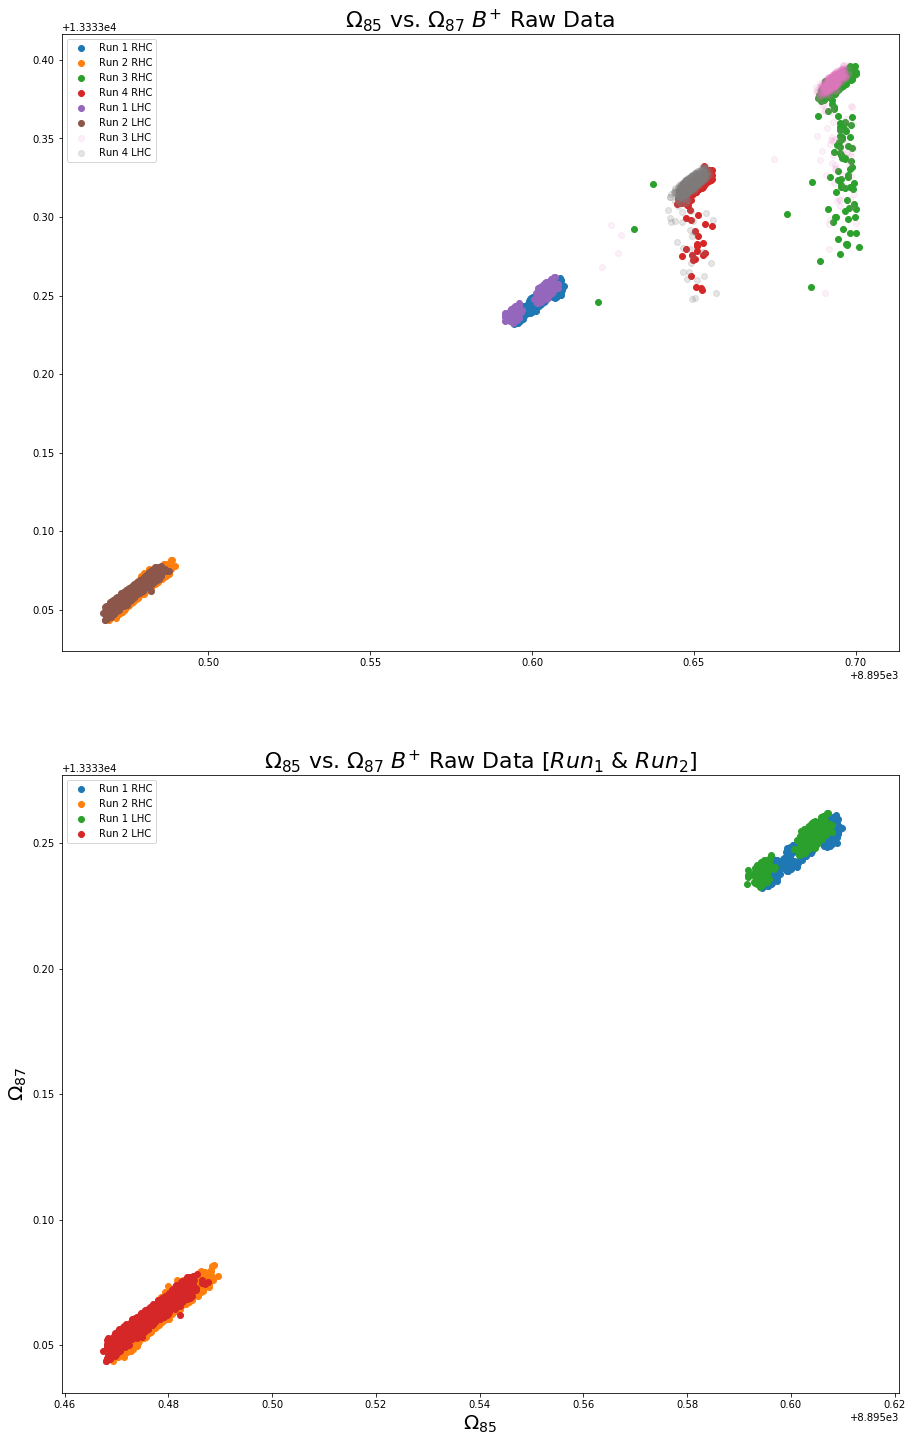

In [20]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (15,25))

### Visualizes the all 4 runs ###
ax1.scatter(raw_pos_RHC_DF_G_One['Run 1']['Omega85'], raw_pos_RHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 RHC')
ax1.scatter(raw_pos_RHC_DF_G_One['Run 2']['Omega85'], raw_pos_RHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 RHC')
ax1.scatter(raw_pos_RHC_DF_G_One['Run 3']['Omega85'], raw_pos_RHC_DF_G_One['Run 3']['Omega87'], label = 'Run 3 RHC')
ax1.scatter(raw_pos_RHC_DF_G_One['Run 4']['Omega85'], raw_pos_RHC_DF_G_One['Run 4']['Omega87'], label = 'Run 4 RHC')


ax1.scatter(raw_pos_LHC_DF_G_One['Run 1']['Omega85'], raw_pos_LHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 LHC')
ax1.scatter(raw_pos_LHC_DF_G_One['Run 2']['Omega85'], raw_pos_LHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 LHC')
ax1.scatter(raw_pos_LHC_DF_G_One['Run 3']['Omega85'], raw_pos_LHC_DF_G_One['Run 3']['Omega87'], label = 'Run 3 LHC', alpha = 0.1)
ax1.scatter(raw_pos_LHC_DF_G_One['Run 4']['Omega85'], raw_pos_LHC_DF_G_One['Run 4']['Omega87'], label = 'Run 4 LHC', alpha = 0.2)
##########

### Visualizes the first 2 runs ###
ax2.scatter(raw_pos_RHC_DF_G_One['Run 1']['Omega85'], raw_pos_RHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 RHC')
ax2.scatter(raw_pos_RHC_DF_G_One['Run 2']['Omega85'], raw_pos_RHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 RHC')


ax2.scatter(raw_pos_LHC_DF_G_One['Run 1']['Omega85'], raw_pos_LHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 LHC')
ax2.scatter(raw_pos_LHC_DF_G_One['Run 2']['Omega85'], raw_pos_LHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 LHC')
##########




ax1.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{+}$ Raw Data", size = 22)
plt.xlabel("$\Omega_{85}$", size = 20)
plt.ylabel("$\Omega_{87}$", size = 20)
ax1.legend(loc = 'upper left')


ax2.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{+}$ Raw Data [$Run_{1} \ & \  Run_{2}$]", size = 22)
plt.xlabel("$\Omega_{85}$", size = 20)
plt.ylabel("$\Omega_{87}$", size = 20)
ax2.legend(loc = 'upper left',)


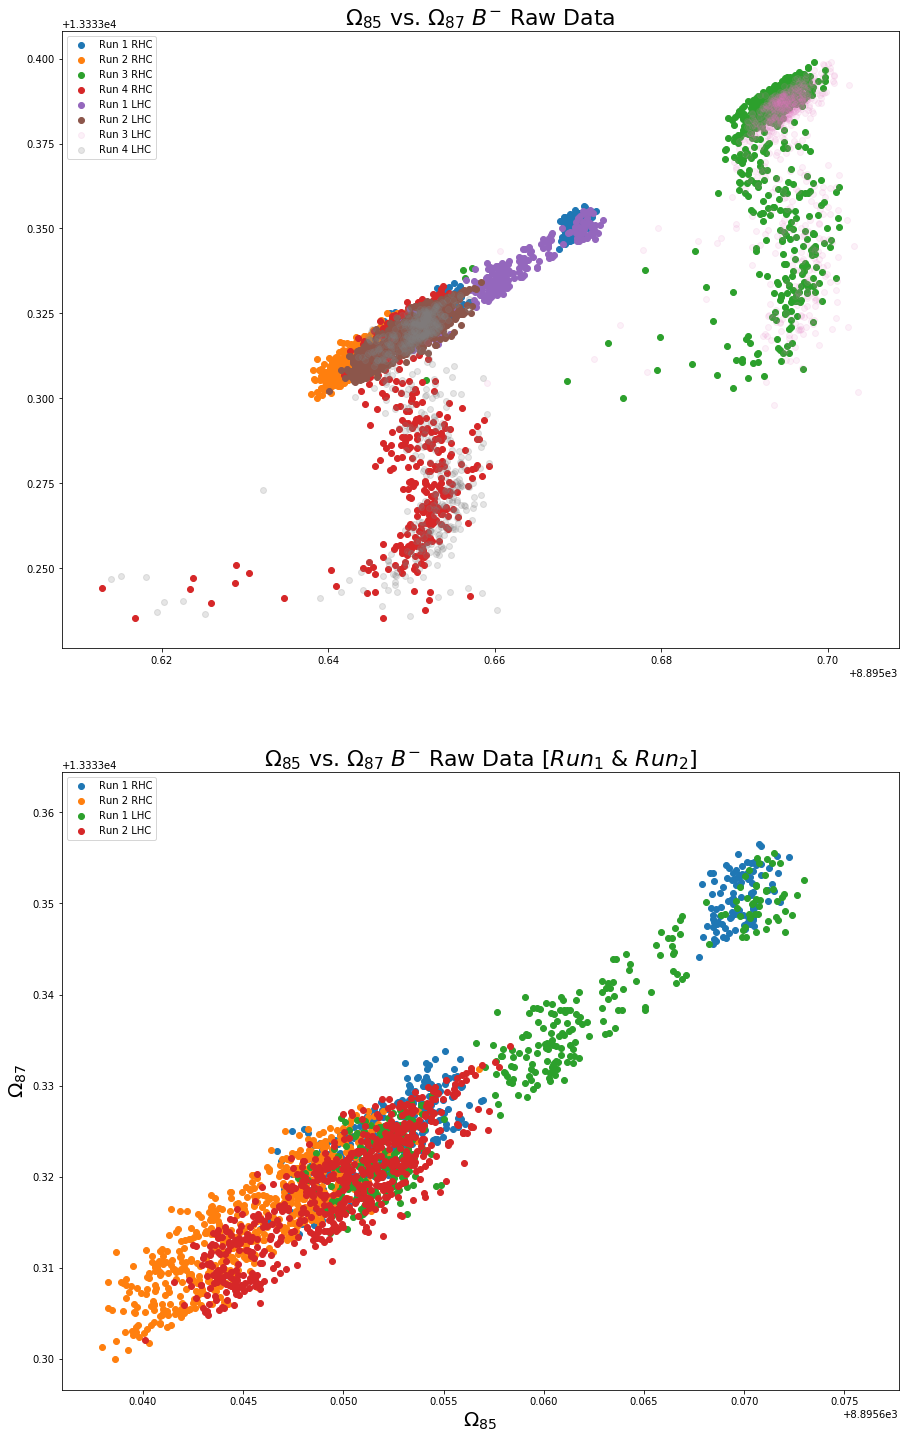

In [21]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (15,25))


## Visualizes the first four runs 
ax1.scatter(raw_neg_RHC_DF_G_One['Run 1']['Omega85'], raw_neg_RHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 RHC')
ax1.scatter(raw_neg_RHC_DF_G_One['Run 2']['Omega85'], raw_neg_RHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 RHC')
ax1.scatter(raw_neg_RHC_DF_G_One['Run 3']['Omega85'], raw_neg_RHC_DF_G_One['Run 3']['Omega87'], label = 'Run 3 RHC')
ax1.scatter(raw_neg_RHC_DF_G_One['Run 4']['Omega85'], raw_neg_RHC_DF_G_One['Run 4']['Omega87'], label = 'Run 4 RHC')


ax1.scatter(raw_neg_LHC_DF_G_One['Run 1']['Omega85'], raw_neg_LHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 LHC')
ax1.scatter(raw_neg_LHC_DF_G_One['Run 2']['Omega85'], raw_neg_LHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 LHC')
ax1.scatter(raw_neg_LHC_DF_G_One['Run 3']['Omega85'], raw_neg_LHC_DF_G_One['Run 3']['Omega87'], label = 'Run 3 LHC', alpha = 0.1)
ax1.scatter(raw_neg_LHC_DF_G_One['Run 4']['Omega85'], raw_neg_LHC_DF_G_One['Run 4']['Omega87'], label = 'Run 4 LHC', alpha = 0.2)
#########

### Visualizes the first two runs ###
ax2.scatter(raw_neg_RHC_DF_G_One['Run 1']['Omega85'], raw_neg_RHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 RHC')
ax2.scatter(raw_neg_RHC_DF_G_One['Run 2']['Omega85'], raw_neg_RHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 RHC')


ax2.scatter(raw_neg_LHC_DF_G_One['Run 1']['Omega85'], raw_neg_LHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 LHC')
ax2.scatter(raw_neg_LHC_DF_G_One['Run 2']['Omega85'], raw_neg_LHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 LHC')

#########


ax1.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{-}$ Raw Data", size = 22)
ax1.legend(loc = 'upper left')


ax2.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{-}$ Raw Data [$Run_{1} \ & \  Run_{2}$]", size = 22) 
ax2.legend(loc = 'upper left')


plt.xlabel("$\Omega_{85}$", size = 20)
plt.ylabel("$\Omega_{87}$", size = 20)



Since we determined that the major contruibution of the noise comes from Runs 3 & 4, therefore we can apply linear regression to determine where the best fit line should be. But this is not going to be an ordinary Linear Regression 'best fit' line; we will use this algorithm adopted in a machine learning context. In machine learning, instead of using the entire dataset, we will take a subset of the data (of randomly selected points) and perform the linear regression on that, then use the remianing subset of the data to determine how accurate our 'prediction'.

<br>
<br>

To perform this, we will consider $ ALL $ measurements in Runs 1,2,3 & 4 in order to generate the an accurate model.
We will first need to need to create a new structure for our data to perform the Linear Regression Model, we'll need to store the data into one giant dataframe where each measurement is a bijection to itself:

<br>
<br>
### $$\mathcal{f} : \Omega_{85} \rightarrow \Omega_{87}$$
<br>
<br>



$$\vec{\Omega^{Run_{i}}_{85}}=
\left(\begin{array}{cc} 
\omega^{85}_{1}\\
\omega^{85}_{2}\\
\omega^{85}_{3}\\
\omega^{85}_{4}\\
\omega^{85}_{5}\\
\omega^{85}_{6}\\
\omega^{85}_{7}\\
\omega^{85}_{8}\\
...\\
\omega^{87}_{n}\\
\end{array}\right)$$

<br>
<br>

$$\vec{\Omega^{Run_{i}}_{87}}=
\left(\begin{array}{cc} 
\omega^{87}_{1}\\
\omega^{87}_{2}\\
\omega^{87}_{3}\\
\omega^{87}_{4}\\
\omega^{87}_{5}\\
\omega^{87}_{6}\\
\omega^{87}_{7}\\
\omega^{87}_{8}\\
...\\
\omega^{87}_{n}\\
\end{array}\right)$$


<br>
<br>
<br>

#### For example: 
$$RHC^{+}=
\left(\begin{array}{cc} 
\vec{\Omega^{Run_{i}}_{85}} & \vec{\Omega^{Run_{i}}_{87}}\\
\end{array}\right)$$



<br>
<br>
<br>

$$X=
\left(\begin{array}{cc} 
RHC^{+}_{filt}\\
RHC^{-}_{filt}\\
LHC^{+}_{filt}\\
LHC^{-}_{filt}\\
\end{array}\right)$$

<br>
<br>
<br>
<br>
<br>

The following 4 blocks of code will create one giant dataframe of the respectivce variables {$B^{+}_{LHC}$ , $B^{-}_{LHC}$ , $B^{+}_{RHC}$ , $B^{-}_{rHC}$} wihch will containt the raw measurements for $\Omega_{85}$ & $\Omega_{87}$, then we will concatenate all of these dataframes into one giant data that will consist of all $\Omega_{85}$ & $\Omega_{87}$ for runs 1,2,3, & 4. for every $\omega_{i} \in \Omega_{85}$ will have a bijection with its respective $\omega_{i}' \in \Omega_{87}$. This structure will help us perform a regression analysis on the dataset to see where we can make the best fit line.

In [22]:
## This block of code will be used for generating a dataframe that will store all of omega 85 & 87 values
## of neg_RHC into one giant dataframe


## Initializes the first dataframe to be merged
temp = pd.concat([raw_neg_RHC_DF_G_One['Run 1']['Omega85'], raw_neg_RHC_DF_G_One['Run 1']['Omega87']], axis = 1, ignore_index = True)


for line in ['Run 2','Run 3','Run 4']:
    
    temp_merge = pd.concat([raw_neg_RHC_DF_G_One[line]['Omega85'], raw_neg_RHC_DF_G_One[line]['Omega87']], axis = 1, ignore_index = True)
    
    temp = pd.concat([temp, temp_merge], ignore_index = True)
    
    
neg_RHC_result = temp

In [23]:
## This block of code will be used for generating a dataframe that will store all of omega 85 & 87 values
## of neg_LHC into one giant dataframe


## Initializes the first dataframe to be merged
temp = pd.concat([raw_neg_LHC_DF_G_One['Run 1']['Omega85'], raw_neg_LHC_DF_G_One['Run 1']['Omega87']], axis = 1, ignore_index = True)


for line in ['Run 2','Run 3','Run 4']:
    
    temp_merge = pd.concat([raw_neg_LHC_DF_G_One[line]['Omega85'], raw_neg_LHC_DF_G_One[line]['Omega87']], axis = 1, ignore_index = True)
    
    temp = pd.concat([temp, temp_merge], ignore_index = True)
    
    
neg_LHC_result = temp

In [24]:
## This block of code will be used for generating a dataframe that will store all of omega 85 & 87 values
## of pos_LHC into one giant dataframe


## Initializes the first dataframe to be merged
temp = pd.concat([raw_pos_RHC_DF_G_One['Run 1']['Omega85'], raw_pos_RHC_DF_G_One['Run 1']['Omega87']], axis = 1, ignore_index = True)


for line in ['Run 2','Run 3','Run 4']:
    
    temp_merge = pd.concat([raw_pos_RHC_DF_G_One[line]['Omega85'], raw_pos_RHC_DF_G_One[line]['Omega87']], axis = 1, ignore_index = True)
    
    temp = pd.concat([temp, temp_merge], ignore_index = True)
    
    
pos_RHC_result = temp

In [25]:
## This block of code will be used for generating a dataframe that will store all of omega 85 & 87 values
## of neg_LHC into one giant dataframe

## Initializes the first dataframe to be merged
temp = pd.concat([raw_pos_LHC_DF_G_One['Run 1']['Omega85'], raw_pos_LHC_DF_G_One['Run 1']['Omega87']], axis = 1, ignore_index = True)


for line in ['Run 2','Run 3','Run 4']:
    
    temp_merge = pd.concat([raw_pos_LHC_DF_G_One[line]['Omega85'], raw_pos_LHC_DF_G_One[line]['Omega87']], axis = 1, ignore_index = True)
    
    temp = pd.concat([temp, temp_merge], ignore_index = True)
    
    
pos_LHC_result = temp

In [26]:
## This merges all of the dataframes above
regress = pd.concat([neg_RHC_result, neg_LHC_result, pos_RHC_result, pos_LHC_result], ignore_index = True)

In [27]:
## Creates a new dataframe that merges a vector of ones used for regression analysis
X = pd.concat([pd.DataFrame(np.ones(len(regress), dtype = float)), regress],axis = 1, ignore_index = True)

In [28]:
## Renames the columns of the data
X.columns = ['Ones', 'Omega85', 'Omega87']

In [29]:
X.head(10)

,Ones,Omega85,Omega87
0,1.0,8895.670318,13333.350942
1,1.0,8895.668363,13333.349463
2,1.0,8895.670198,13333.352669
3,1.0,8895.670417,13333.348421
4,1.0,8895.669248,13333.353884
5,1.0,8895.669310,13333.348440
6,1.0,8895.669867,13333.354066
7,1.0,8895.668470,13333.347933
8,1.0,8895.667746,13333.344083
9,1.0,8895.668511,13333.346055


In [30]:
X.shape

(9280, 3)

### Linear Regression Analysis
<br>
Now that we have our data prepared for linear regression we will perform this linear regression a large number of times so that as $n \rightarrow \infty$ we can say with confidence that our model is stable. Therefore we will perform a linear regression 1000 (subject to change) and save all of those 1000 metrics.
<br>
In our model we will use a nice 70% training set data and 30% testing data. We will visualize all metrics to determine the best fit for our data.

In [31]:
line_regress_list = [] 

## Creating the Linear Regression model
lm = LinearRegression()

## Creating a list that will store the data
slopes = []
y_ints = []
mse = []
r_sqr = []

## Creating a loop that will iterate 1000 times
## This loop will be used to perform linear regression 1000 times
for index in range(1000):
    
    ## Splitting the test and train data
    X_train, X_test, Y_train, Y_test = train_test_split(X[['Ones','Omega85']], X['Omega87'], test_size = 0.30, random_state = 101)
    
    ## Fitting the data to the linear regression model
    lm.fit(X_train, Y_train)
    
    ## Calls the regression model and predicts the values 
    predicts = lm.predict(X_test)
    
    ## Saves all of the metrics of the linear regression
    slopes.append(lm.coef_[1])
    y_ints.append(lm.intercept_)
    mse.append(metrics.mean_squared_error(Y_test, predicts))
    r_sqr.append(metrics.r2_score(Y_test, predicts))

In [32]:
np.mean(slopes)

1.4508332245442674

In [33]:
np.mean(y_ints)

427.20925989562426

In [34]:
np.mean(mse)

0.00032839577547225161

In [35]:
np.mean(r_sqr)

0.96700946137786281

From the stress test above, after 100000 iterations of the Linear Regression Model, we can observe a convergence, the metric that needds to be given more attention is the $R^{2}$ metric. The reason is that the difference between $R^{2}$ in the tradition Linear Regression model and the machine learning context version is that in the tradition model, $R^{2}$ value is interpreted on how the line fits through the enture dataset, therefore there could be measurements that will heavily influence the line upward or downward pending how noisy the dataset is.
On the otherhand, in a machine learning context, we can interpret the $R^{2}$ value as way to ensure that we are able to predict a value with $R^{2}$. This idea to be confident in our prediction opens the doors to using this model to itroduce new datasets and see how accurate the data fits the currrent trend.
<br>
Since we observed that Runs 1 & 2 are "great" measurements (in comparision from Runs 3 & 4), it is safe to assume that since we used the entire dataset for Runs 1,2,3, & 4 that we have our best fit line with the following linear model:
<br>
<br>

$$ f(x) = 1.4508332245442672\ x + 427.209259895$$
<br>
$$ w/\ MSE: 0.000328395775\ and\ R^{2} = 0.96700946137786292$$
<br>
<br>

In [36]:
## Creating a linear function based with our best line fit parameters
f = lambda x: np.mean(slopes) * x + np.mean(y_ints)

In [37]:
## Calculates the standard deviation of the residuals to account for a lower bound
## As per Dr. Kimball
sigs = np.std(X['Omega85'].apply(f) - X['Omega87'])

In [38]:
## Calculates the new model with the correction
f = lambda x: np.mean(slopes) * x + np.mean(y_ints) - sigs

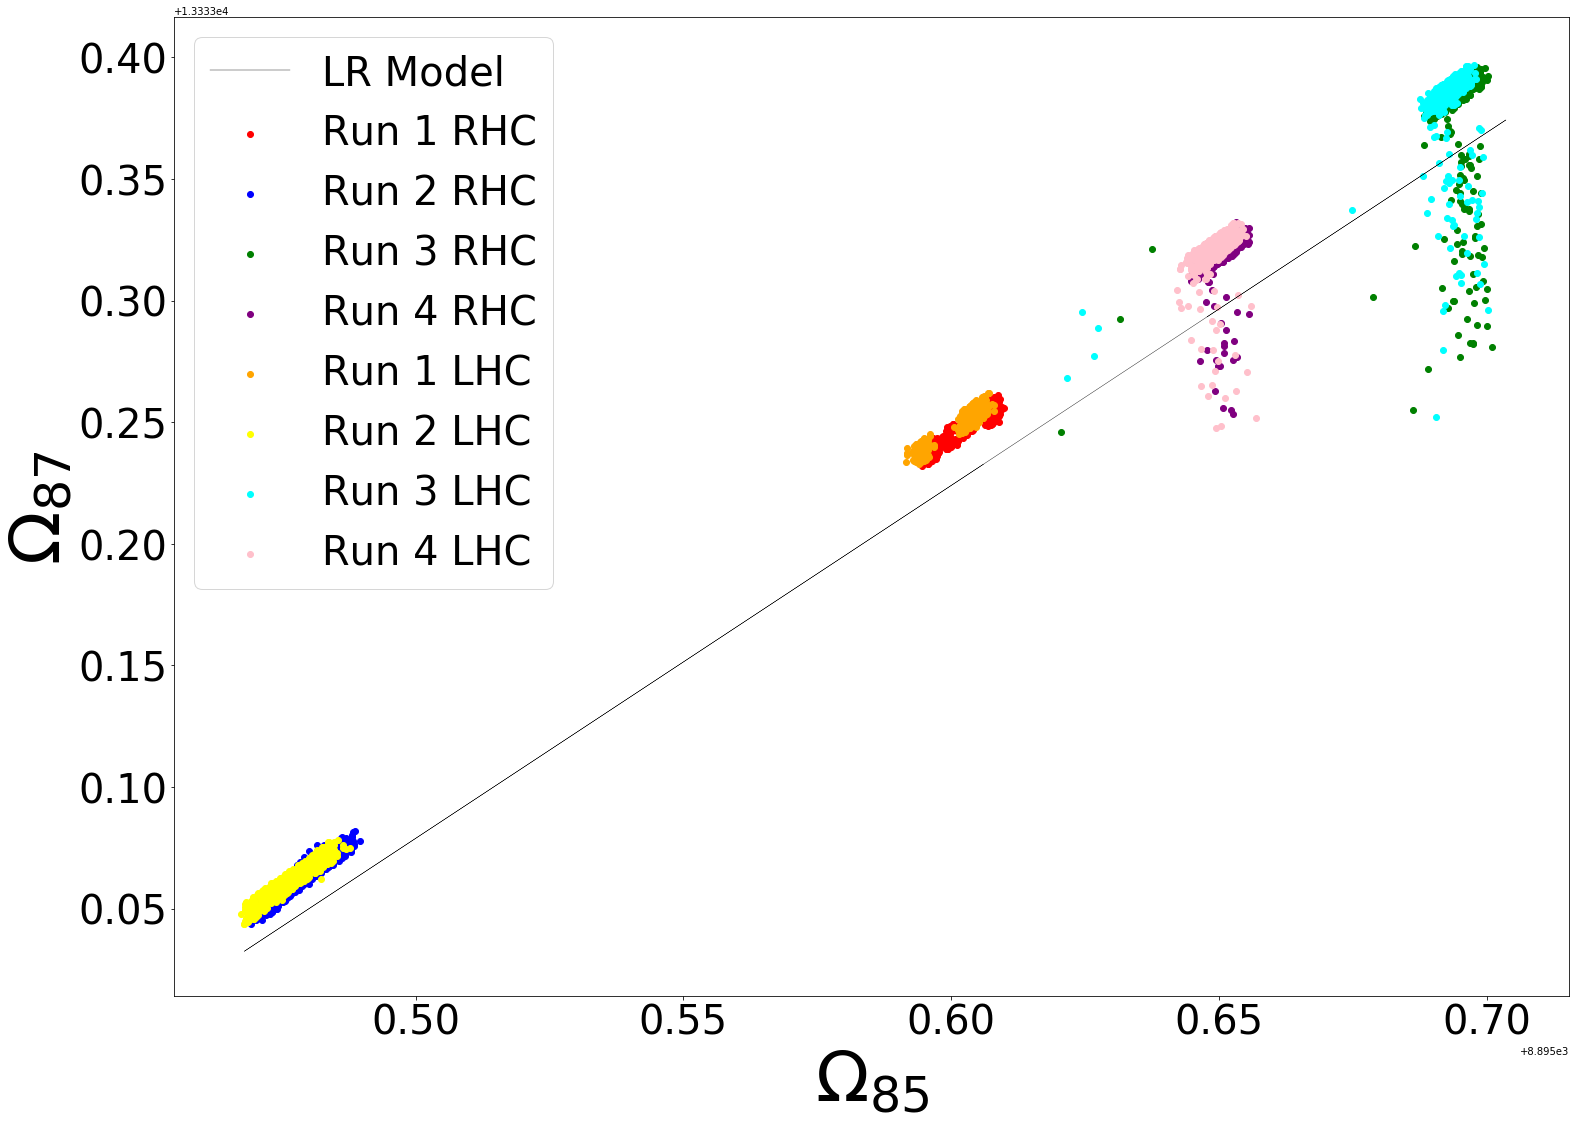

In [39]:
plt.figure(figsize = (25,18))

### Visualizes the all 4 runs for positive B-field ###
plt.scatter(raw_pos_RHC_DF_G_One['Run 1']['Omega85'], raw_pos_RHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 RHC', color = 'red')
plt.scatter(raw_pos_RHC_DF_G_One['Run 2']['Omega85'], raw_pos_RHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 RHC', color = 'blue')
plt.scatter(raw_pos_RHC_DF_G_One['Run 3']['Omega85'], raw_pos_RHC_DF_G_One['Run 3']['Omega87'], label = 'Run 3 RHC', color = 'green')
plt.scatter(raw_pos_RHC_DF_G_One['Run 4']['Omega85'], raw_pos_RHC_DF_G_One['Run 4']['Omega87'], label = 'Run 4 RHC', color = 'purple')


plt.scatter(raw_pos_LHC_DF_G_One['Run 1']['Omega85'], raw_pos_LHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 LHC', color = 'orange')
plt.scatter(raw_pos_LHC_DF_G_One['Run 2']['Omega85'], raw_pos_LHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 LHC', color = 'yellow')
plt.scatter(raw_pos_LHC_DF_G_One['Run 3']['Omega85'], raw_pos_LHC_DF_G_One['Run 3']['Omega87'], label = 'Run 3 LHC', color = 'cyan')
plt.scatter(raw_pos_LHC_DF_G_One['Run 4']['Omega85'], raw_pos_LHC_DF_G_One['Run 4']['Omega87'], label = 'Run 4 LHC', color = 'pink')


## Plots our linear model
plt.plot(X_test['Omega85'], f(X_test['Omega85']), color = 'black', linewidth = 0.4, label = 'LR Model')

plt.xlabel("$\Omega_{85}$", size = 70)
plt.ylabel("$\Omega_{87}$", size = 70)
plt.xticks(size = 40)
plt.yticks(size = 40)
plt.legend(loc = 'upper left', prop = {'size': 40})


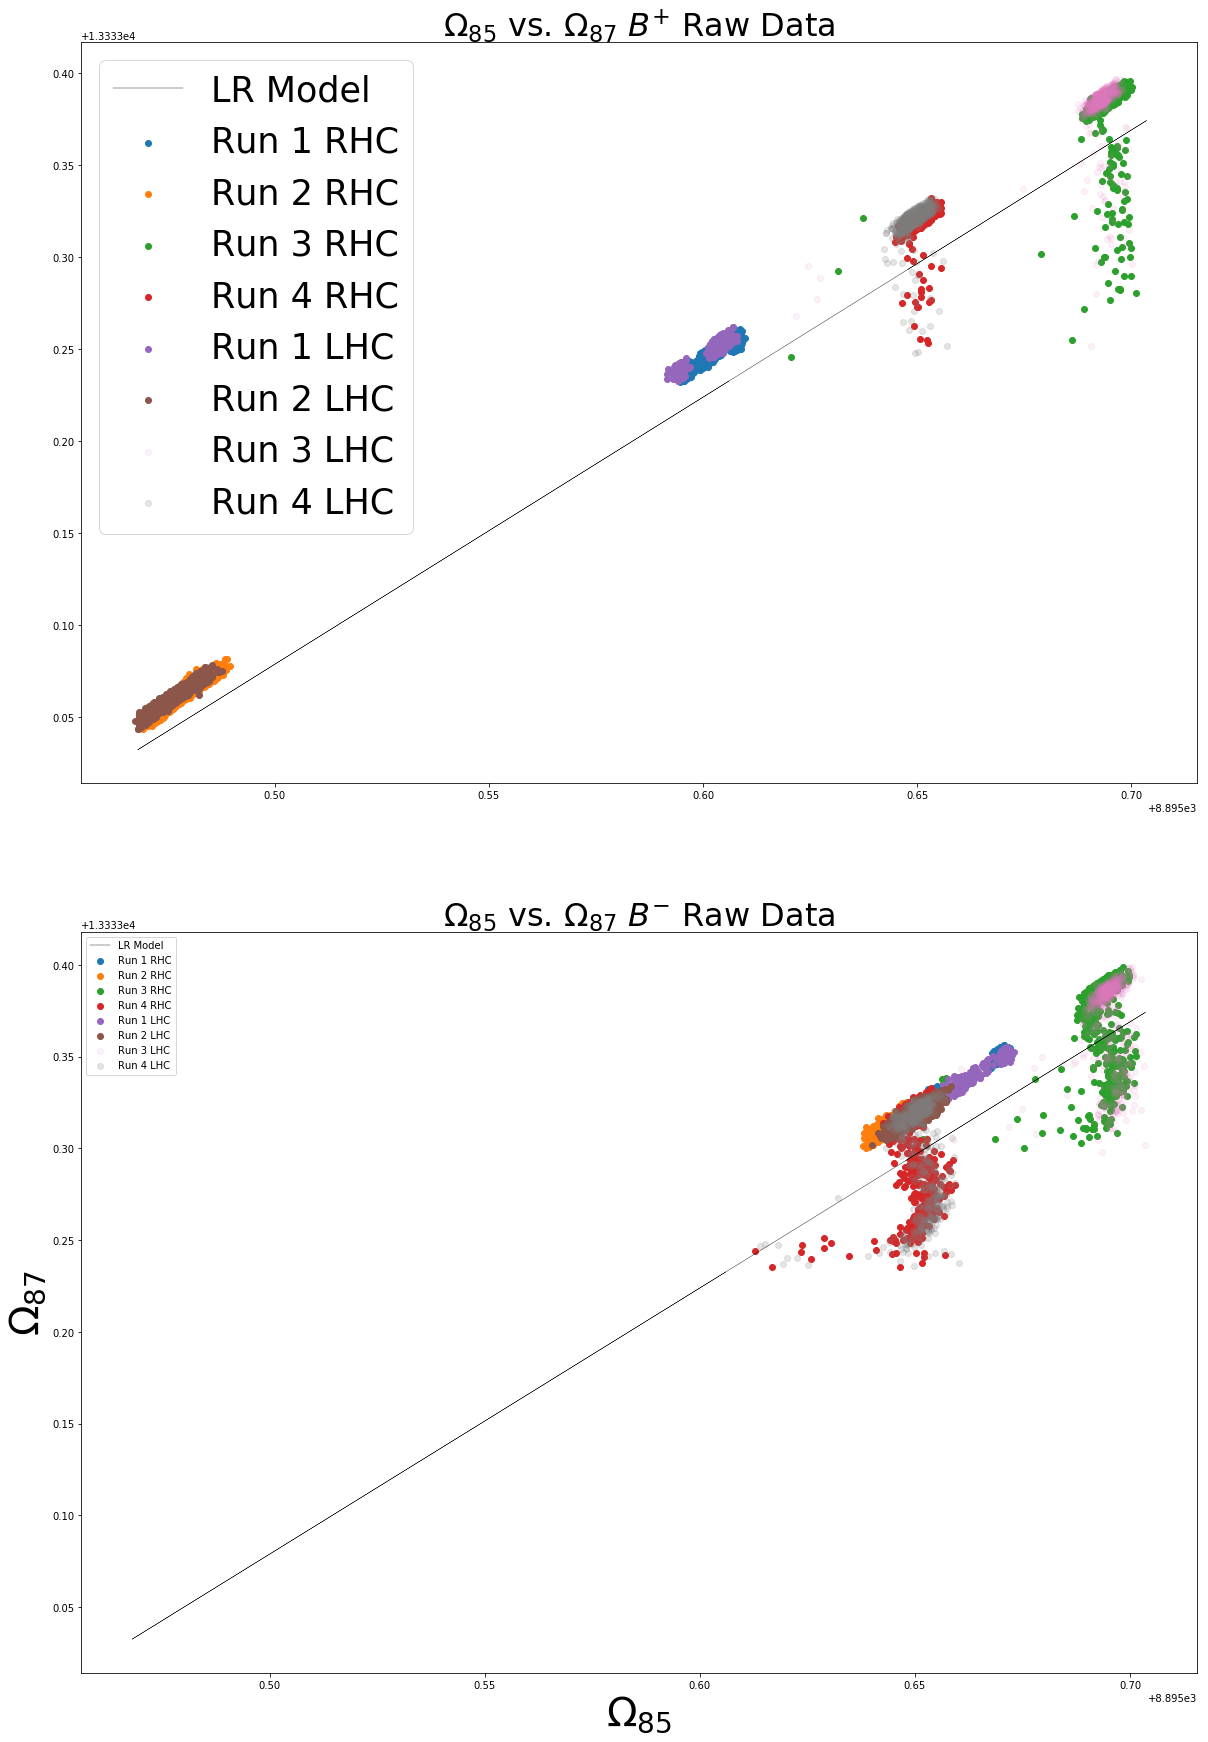

In [40]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (20,30))

### Visualizes the all 4 runs for positive B-field ###
ax1.scatter(raw_pos_RHC_DF_G_One['Run 1']['Omega85'], raw_pos_RHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 RHC')
ax1.scatter(raw_pos_RHC_DF_G_One['Run 2']['Omega85'], raw_pos_RHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 RHC')
ax1.scatter(raw_pos_RHC_DF_G_One['Run 3']['Omega85'], raw_pos_RHC_DF_G_One['Run 3']['Omega87'], label = 'Run 3 RHC')
ax1.scatter(raw_pos_RHC_DF_G_One['Run 4']['Omega85'], raw_pos_RHC_DF_G_One['Run 4']['Omega87'], label = 'Run 4 RHC')


ax1.scatter(raw_pos_LHC_DF_G_One['Run 1']['Omega85'], raw_pos_LHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 LHC')
ax1.scatter(raw_pos_LHC_DF_G_One['Run 2']['Omega85'], raw_pos_LHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 LHC')
ax1.scatter(raw_pos_LHC_DF_G_One['Run 3']['Omega85'], raw_pos_LHC_DF_G_One['Run 3']['Omega87'], label = 'Run 3 LHC', alpha = 0.1)
ax1.scatter(raw_pos_LHC_DF_G_One['Run 4']['Omega85'], raw_pos_LHC_DF_G_One['Run 4']['Omega87'], label = 'Run 4 LHC', alpha = 0.2)


## Plots our linear model
ax1.plot(X_test['Omega85'], f(X_test['Omega85']), color = 'black', linewidth = 0.4, label = 'LR Model')



##########


### Visualizes the all 4 runs for negative B-field ###
ax2.scatter(raw_neg_RHC_DF_G_One['Run 1']['Omega85'], raw_neg_RHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 RHC')
ax2.scatter(raw_neg_RHC_DF_G_One['Run 2']['Omega85'], raw_neg_RHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 RHC')
ax2.scatter(raw_neg_RHC_DF_G_One['Run 3']['Omega85'], raw_neg_RHC_DF_G_One['Run 3']['Omega87'], label = 'Run 3 RHC')
ax2.scatter(raw_neg_RHC_DF_G_One['Run 4']['Omega85'], raw_neg_RHC_DF_G_One['Run 4']['Omega87'], label = 'Run 4 RHC')


ax2.scatter(raw_neg_LHC_DF_G_One['Run 1']['Omega85'], raw_neg_LHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 LHC')
ax2.scatter(raw_neg_LHC_DF_G_One['Run 2']['Omega85'], raw_neg_LHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 LHC')
ax2.scatter(raw_neg_LHC_DF_G_One['Run 3']['Omega85'], raw_neg_LHC_DF_G_One['Run 3']['Omega87'], label = 'Run 3 LHC', alpha = 0.1)
ax2.scatter(raw_neg_LHC_DF_G_One['Run 4']['Omega85'], raw_neg_LHC_DF_G_One['Run 4']['Omega87'], label = 'Run 4 LHC', alpha = 0.2)



## Plots our linear model
ax2.plot(X_test['Omega85'], f(X_test['Omega85']), color = 'black', linewidth = 0.4, label = 'LR Model')


##########


ax1.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{+}$ Raw Data", size = 32)
plt.xlabel("$\Omega_{85}$", size = 40)
plt.ylabel("$\Omega_{87}$", size = 40)
ax1.legend(loc = 'upper left', prop = {'size': 35})


ax2.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{-}$ Raw Data", size = 32)
plt.xlabel("$\Omega_{85}$", size = 40)
plt.ylabel("$\Omega_{87}$", size = 40)
ax2.legend(loc = 'upper left')



In the figure above, we can see that we made a best fit line that cuts through the entire dataset for Runs 1,2,3,and 4. Now the big question is how to isolate the noisy data from the the rest of the dataset and justifiably remove it?
<br>
If we look at it from the perspective of classfication, we can observe that we essentially took a machine learning algorithm used for prediction and can transform it for classification. The way we do this is by calculating the residuals of the Runs 3 an 4 since we visually saw that they are the datasets that contribute to the most noise overall. Therefore, we can isolate the two sides of the data and see what lies between the lines.
<br>
Here is how we classify data using the residuals:
<br>
- $if\ \ \hat{f(x)}\ -\ f(x) > 0 \rightarrow data\ is\ above\ the\ line\ $
- $if\ \ \hat{f(x)}\ -\ f(x) < 0 \rightarrow data\ is\ below\ the\ line\ $
- $if\ \ \hat{f(x)}\ -\ f(x) = 0 \rightarrow data\ is\ on\ the\ line\ $

<br>
By this criteria, we can be safe to assume that we need to only isolate the data points above the line, thus we can just isolate those points and neglect anything below the line because from inspection we can see that is where the noisy data lives.


### Creating list data points for each run that are 'cleaned' up from the linear regression model
#### Will be applied to all variables in our dataset

In [41]:
## Creating a list of strings that contains the runs we are going to filter data from
filt_list = ['Run 3', 'Run 4']

In [42]:
## Creating a list that will store the measurements that are 'cleaned' from the linear regression model
neg_RHC_Cln_G_One = []

## Creates a list of the measurements 
## NOTE: This list has the runs in accending order
for line in filt_list:
    neg_RHC_Cln_G_One.append(raw_neg_RHC_DF_G_One[line][raw_neg_RHC_DF_G_One[line]['Omega87'] - raw_neg_RHC_DF_G_One[line]['Omega85'].apply(f) >= 0].index)

In [43]:
## Creating a list that will store the measurements that are 'cleaned' from the linear regression model
neg_LHC_Cln_G_One = []

## Creates a list of the measurements 
## NOTE: This list has the runs in accending order
for line in filt_list:
    neg_LHC_Cln_G_One.append(raw_neg_LHC_DF_G_One[line][(raw_neg_LHC_DF_G_One[line]['Omega87'] - raw_neg_LHC_DF_G_One[line]['Omega85'].apply(f)) >= 0].index)

In [44]:
## Creating a list that will store the measurements that are 'cleaned' from the linear regression model
pos_RHC_Cln_G_One = []

## Creates a list of the measurements 
## NOTE: This list has the runs in accending order
for line in filt_list:
    pos_RHC_Cln_G_One.append(raw_pos_RHC_DF_G_One[line][(raw_pos_RHC_DF_G_One[line]['Omega87'] - raw_pos_RHC_DF_G_One[line]['Omega85'].apply(f)) >= 0].index)

In [45]:
## Creating a list that will store the measurements that are 'cleaned' from the linear regression model
pos_LHC_Cln_G_One = []

## Creates a list of the measurements 
## NOTE: This list has the runs in accending order
for line in filt_list:
    pos_LHC_Cln_G_One.append(raw_pos_LHC_DF_G_One[line][(raw_pos_LHC_DF_G_One[line]['Omega87'] - raw_pos_LHC_DF_G_One[line]['Omega85'].apply(f)) >= 0].index)

### Percent of data removed for negative B-Fields

In [46]:
## Negative RHC Run 3
(1 - len(neg_RHC_Cln_G_One[0]) / raw_neg_RHC_DF_G_One['Run 3'].shape[0]) * 100

25.78125

In [47]:
## Negative RHC Run 4
(1 - len(neg_RHC_Cln_G_One[1]) / raw_neg_RHC_DF_G_One['Run 4'].shape[0]) * 100

39.6875

In [48]:
## Negative LHC Run 3
(1 - len(neg_LHC_Cln_G_One[0]) / raw_neg_LHC_DF_G_One['Run 3'].shape[0]) * 100

28.281250000000004

In [49]:
## Negative LHC Run 4
(1 - len(neg_LHC_Cln_G_One[1]) / raw_neg_LHC_DF_G_One['Run 4'].shape[0]) * 100

37.81250000000001

### Percent of data removed for positive B-Fields

In [50]:
## Positive LHC Run 3
(1 - len(pos_LHC_Cln_G_One[0]) / raw_pos_LHC_DF_G_One['Run 3'].shape[0]) * 100

6.874999999999998

In [51]:
## Positive LHC Run 4
(1 - len(pos_LHC_Cln_G_One[1]) / raw_pos_LHC_DF_G_One['Run 4'].shape[0]) * 100

2.968749999999998

In [52]:
## Negative RHC Run 3
(1 - len(pos_RHC_Cln_G_One[0]) / raw_pos_RHC_DF_G_One['Run 3'].shape[0]) * 100

10.624999999999996

In [53]:
## Negative RHC Run 4
(1 - len(pos_RHC_Cln_G_One[1]) / raw_pos_RHC_DF_G_One['Run 4'].shape[0]) * 100

2.968749999999998

As hypthoesized, the majority of the bad data comes from the $B^{-}$ field for both RHC and LHC polarization. What this gives us a reason to reject this data. The reason we can reject this data is due to a systematic error in the power supply when performing Runs 3 and 4. [This section can be explained by Dr. Kimball more during the discussion section of the paper]

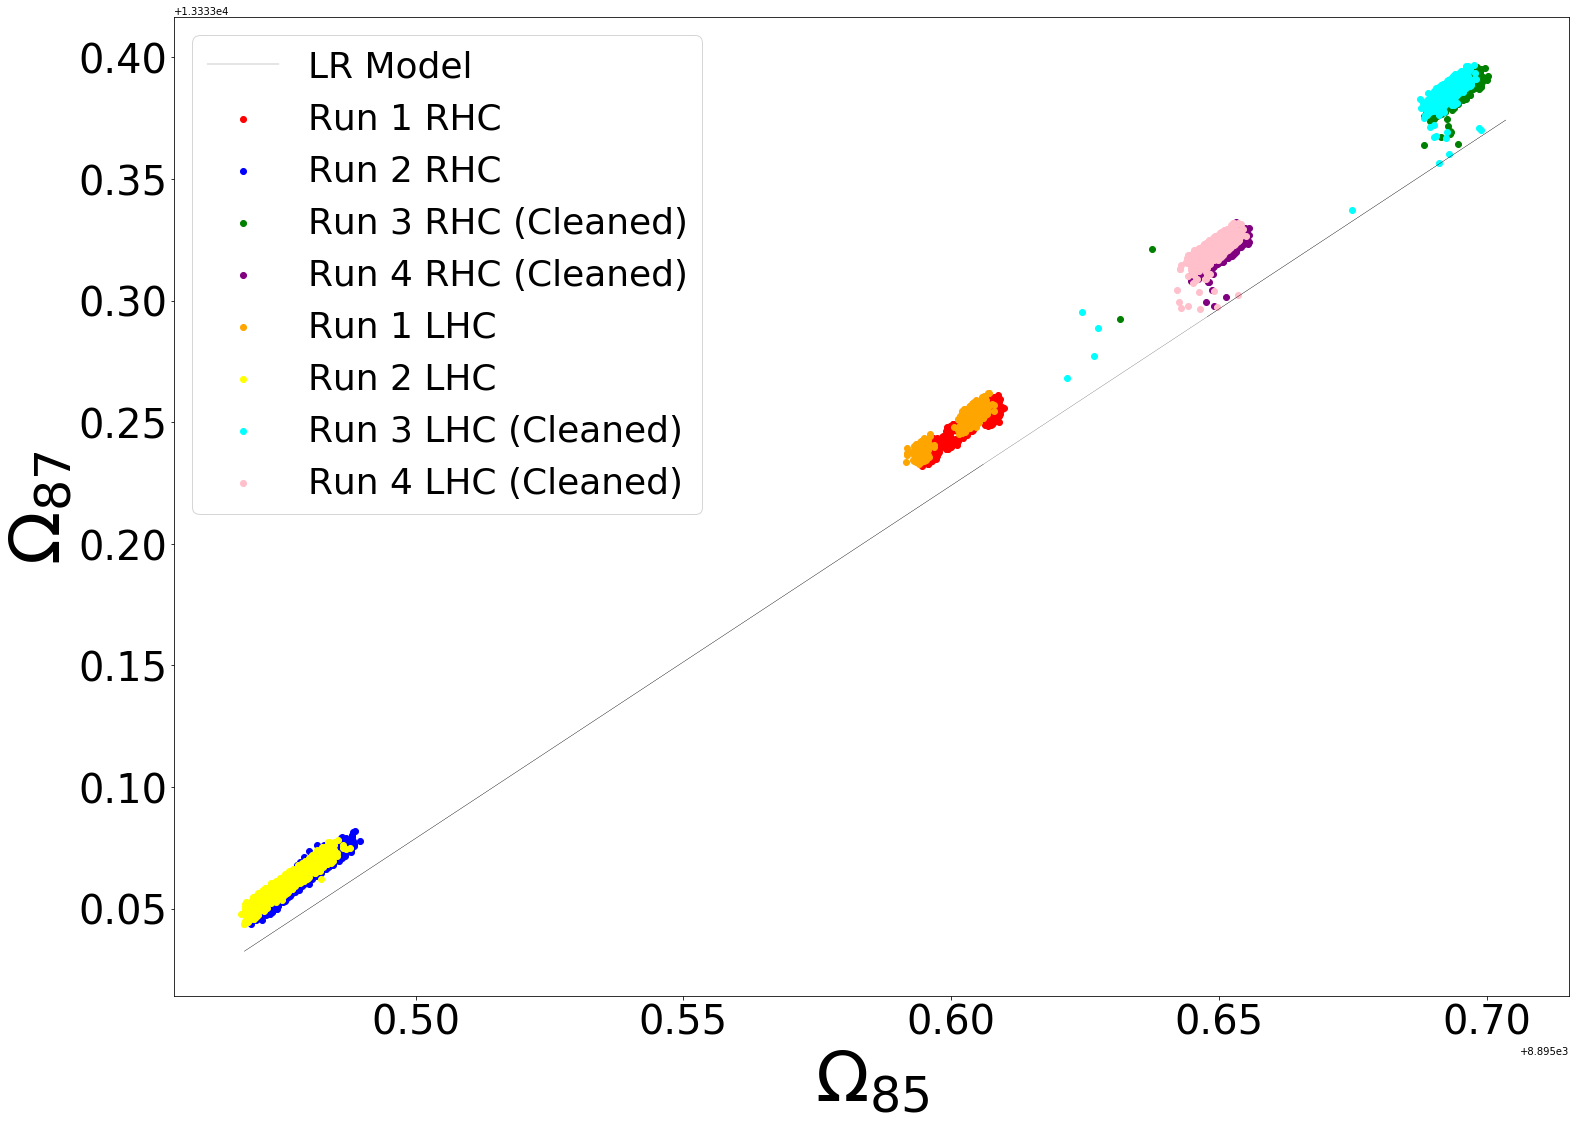

In [54]:
plt.figure(figsize = (25,18))


## Plots the cleaned dataset for the negative B-field
plt.scatter(raw_pos_RHC_DF_G_One['Run 1']['Omega85'], raw_pos_RHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 RHC', color = 'red')
plt.scatter(raw_pos_RHC_DF_G_One['Run 2']['Omega85'], raw_pos_RHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 RHC', color = 'blue')
plt.scatter(raw_pos_RHC_DF_G_One['Run 3']['Omega85'].iloc[pos_RHC_Cln_G_One[0]], raw_pos_RHC_DF_G_One['Run 3']['Omega87'].iloc[pos_RHC_Cln_G_One[0]], label = 'Run 3 RHC (Cleaned)', color = 'green')
plt.scatter(raw_pos_RHC_DF_G_One['Run 4']['Omega85'].iloc[pos_RHC_Cln_G_One[1]], raw_pos_RHC_DF_G_One['Run 4']['Omega87'].iloc[pos_RHC_Cln_G_One[1]], label = 'Run 4 RHC (Cleaned)', color = 'purple')



plt.scatter(raw_pos_LHC_DF_G_One['Run 1']['Omega85'], raw_pos_LHC_DF_G_One['Run 1']['Omega87'], label = 'Run 1 LHC', color = 'orange')
plt.scatter(raw_pos_LHC_DF_G_One['Run 2']['Omega85'], raw_pos_LHC_DF_G_One['Run 2']['Omega87'], label = 'Run 2 LHC',color = 'yellow')
plt.scatter(raw_pos_LHC_DF_G_One['Run 3']['Omega85'].iloc[pos_LHC_Cln_G_One[0]], raw_pos_LHC_DF_G_One['Run 3']['Omega87'].iloc[pos_LHC_Cln_G_One[0]], label = 'Run 3 LHC (Cleaned)', color = 'cyan')
plt.scatter(raw_pos_LHC_DF_G_One['Run 4']['Omega85'].iloc[pos_LHC_Cln_G_One[1]], raw_pos_LHC_DF_G_One['Run 4']['Omega87'].iloc[pos_LHC_Cln_G_One[1]], label = 'Run 4 LHC (Cleaned)', color = 'pink')



## Plots the linear regression model
plt.plot(X_test['Omega85'], f(X_test['Omega85']), color = 'black',linewidth = 0.2, label = 'LR Model')

plt.xlabel("$\Omega_{85}$", size = 70)
plt.ylabel("$\Omega_{87}$", size = 70)
plt.xticks(size = 40)
plt.yticks(size = 40)
plt.legend(loc = 'upper left', prop = {'size': 36})

plt.savefig("/Users/jasonmora/Desktop/finalcut.pdf")

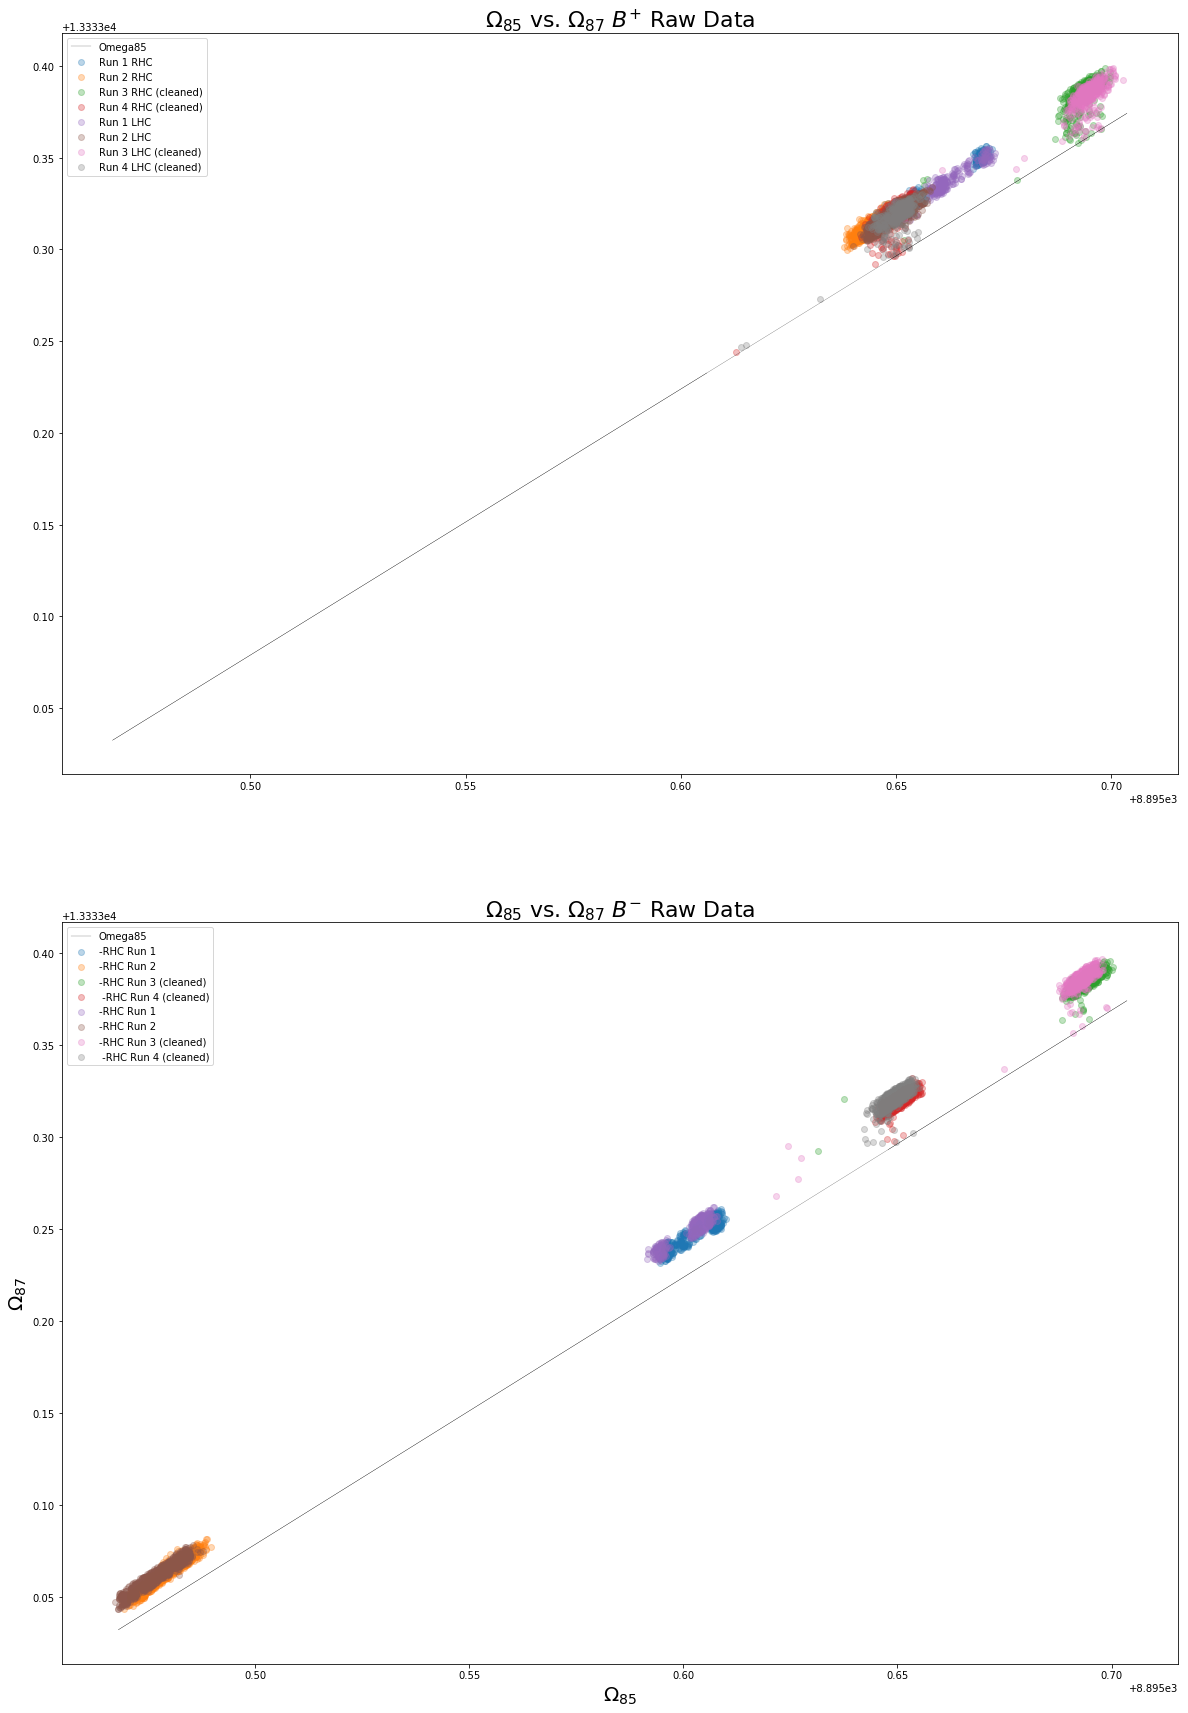

In [55]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (20,30))


## Plots the cleaned dataset for the negative B-field
ax1.scatter(raw_neg_RHC_DF_G_One['Run 1']['Omega85'], raw_neg_RHC_DF_G_One['Run 1']['Omega87'], alpha = 0.3, label = 'Run 1 RHC')
ax1.scatter(raw_neg_RHC_DF_G_One['Run 2']['Omega85'], raw_neg_RHC_DF_G_One['Run 2']['Omega87'], alpha = 0.3, label = 'Run 2 RHC')
ax1.scatter(raw_neg_RHC_DF_G_One['Run 3']['Omega85'].iloc[neg_RHC_Cln_G_One[0]], raw_neg_RHC_DF_G_One['Run 3']['Omega87'].iloc[neg_RHC_Cln_G_One[0]], alpha = 0.3, label = 'Run 3 RHC (cleaned)')
ax1.scatter(raw_neg_RHC_DF_G_One['Run 4']['Omega85'].iloc[neg_RHC_Cln_G_One[1]], raw_neg_RHC_DF_G_One['Run 4']['Omega87'].iloc[neg_RHC_Cln_G_One[1]], alpha = 0.3, label = 'Run 4 RHC (cleaned)')


ax1.scatter(raw_neg_LHC_DF_G_One['Run 1']['Omega85'], raw_neg_LHC_DF_G_One['Run 1']['Omega87'], alpha = 0.3, label = 'Run 1 LHC')
ax1.scatter(raw_neg_LHC_DF_G_One['Run 2']['Omega85'], raw_neg_LHC_DF_G_One['Run 2']['Omega87'], alpha = 0.3, label = 'Run 2 LHC')
ax1.scatter(raw_neg_LHC_DF_G_One['Run 3']['Omega85'].iloc[neg_LHC_Cln_G_One[0]], raw_neg_LHC_DF_G_One['Run 3']['Omega87'].iloc[neg_LHC_Cln_G_One[0]], alpha = 0.3, label = 'Run 3 LHC (cleaned)')
ax1.scatter(raw_neg_LHC_DF_G_One['Run 4']['Omega85'].iloc[neg_LHC_Cln_G_One[1]], raw_neg_LHC_DF_G_One['Run 4']['Omega87'].iloc[neg_LHC_Cln_G_One[1]], alpha = 0.3, label = 'Run 4 LHC (cleaned)')


ax1.plot(X_test['Omega85'], f(X_test['Omega85']), color = 'black',linewidth = 0.2)

########################################



## Plots the cleaned dataset for the positive B-field
ax2.scatter(raw_pos_RHC_DF_G_One['Run 1']['Omega85'], raw_pos_RHC_DF_G_One['Run 1']['Omega87'], alpha = 0.3, label = '-RHC Run 1')
ax2.scatter(raw_pos_RHC_DF_G_One['Run 2']['Omega85'], raw_pos_RHC_DF_G_One['Run 2']['Omega87'], alpha = 0.3, label = '-RHC Run 2')
ax2.scatter(raw_pos_RHC_DF_G_One['Run 3']['Omega85'].iloc[pos_RHC_Cln_G_One[0]], raw_pos_RHC_DF_G_One['Run 3']['Omega87'].iloc[pos_RHC_Cln_G_One[0]], alpha = 0.3, label = '-RHC Run 3 (cleaned)')
ax2.scatter(raw_pos_RHC_DF_G_One['Run 4']['Omega85'].iloc[pos_RHC_Cln_G_One[1]], raw_pos_RHC_DF_G_One['Run 4']['Omega87'].iloc[pos_RHC_Cln_G_One[1]], alpha = 0.3, label = ' -RHC Run 4 (cleaned)')



ax2.scatter(raw_pos_LHC_DF_G_One['Run 1']['Omega85'], raw_pos_LHC_DF_G_One['Run 1']['Omega87'], alpha = 0.3, label = '-RHC Run 1')
ax2.scatter(raw_pos_LHC_DF_G_One['Run 2']['Omega85'], raw_pos_LHC_DF_G_One['Run 2']['Omega87'], alpha = 0.3, label = '-RHC Run 2')
ax2.scatter(raw_pos_LHC_DF_G_One['Run 3']['Omega85'].iloc[pos_LHC_Cln_G_One[0]], raw_pos_LHC_DF_G_One['Run 3']['Omega87'].iloc[pos_LHC_Cln_G_One[0]], alpha = 0.3, label = '-RHC Run 3 (cleaned)')
ax2.scatter(raw_pos_LHC_DF_G_One['Run 4']['Omega85'].iloc[pos_LHC_Cln_G_One[1]], raw_pos_LHC_DF_G_One['Run 4']['Omega87'].iloc[pos_LHC_Cln_G_One[1]], alpha = 0.3, label = ' -RHC Run 4 (cleaned)')



## Plots the linear regression model
ax2.plot(X_test['Omega85'], f(X_test['Omega85']), color = 'black',linewidth = 0.2)

#############################################





ax1.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{+}$ Raw Data", size = 22)
plt.xlabel("$\Omega_{85}$", size = 20)
plt.ylabel("$\Omega_{87}$", size = 20)
ax1.legend(loc = 'upper left')


ax2.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{-}$ Raw Data", size = 22)
plt.xlabel("$\Omega_{85}$", size = 20)
plt.ylabel("$\Omega_{87}$", size = 20)
ax2.legend(loc = 'upper left')


Now that we have isolated the data, we can then use this cleaned dataset to calcualte the g-factor ratio. The g-factor ratio will be a calculation of averages and the uncertainties. The next block of code will save all of the mean ratios from each variable and then these will be averaged.

In [56]:
neg_RHC_avg_ratios_one = [raw_neg_RHC_DF_G_One['Run 1']['gyromagRatioRatio'].mean() ,raw_neg_RHC_DF_G_One['Run 2']['gyromagRatioRatio'].mean()]

neg_RHC_std_ratios_one = [raw_neg_RHC_DF_G_One['Run 1']['gyromagRatioRatio'].std(), raw_neg_RHC_DF_G_One['Run 2']['gyromagRatioRatio'].std()]



neg_RHC_avg_ratios_two = [raw_neg_RHC_DF_G_One['Run 3']['gyromagRatioRatio'].iloc[neg_RHC_Cln_G_One[0]].mean() ,raw_neg_RHC_DF_G_One['Run 4']['gyromagRatioRatio'].iloc[neg_RHC_Cln_G_One[1]].mean()]

neg_RHC_std_ratios_two = [raw_neg_RHC_DF_G_One['Run 3']['gyromagRatioRatio'].iloc[neg_RHC_Cln_G_One[0]].std(), raw_neg_RHC_DF_G_One['Run 4']['gyromagRatioRatio'].iloc[neg_RHC_Cln_G_One[1]].std()]

In [57]:
neg_LHC_avg_ratios_one = [raw_neg_LHC_DF_G_One['Run 1']['gyromagRatioRatio'].mean(), raw_neg_LHC_DF_G_One['Run 2']['gyromagRatioRatio'].mean()]

neg_LHC_std_ratios_one = [raw_neg_LHC_DF_G_One['Run 1']['gyromagRatioRatio'].std() ,raw_neg_LHC_DF_G_One['Run 2']['gyromagRatioRatio'].std()]




neg_LHC_avg_ratios_two = [raw_neg_LHC_DF_G_One['Run 3']['gyromagRatioRatio'].iloc[neg_LHC_Cln_G_One[0]].mean()
                 ,raw_neg_LHC_DF_G_One['Run 4']['gyromagRatioRatio'].iloc[neg_LHC_Cln_G_One[1]].mean()]

neg_LHC_std_ratios_two = [raw_neg_LHC_DF_G_One['Run 3']['gyromagRatioRatio'].iloc[neg_LHC_Cln_G_One[0]].std()
                 ,raw_neg_LHC_DF_G_One['Run 4']['gyromagRatioRatio'].iloc[neg_LHC_Cln_G_One[1]].std()]

In [58]:
pos_RHC_avg_ratios_one = [raw_pos_RHC_DF_G_One['Run 1']['gyromagRatioRatio'].mean() ,raw_pos_RHC_DF_G_One['Run 2']['gyromagRatioRatio'].mean()]

pos_RHC_std_ratios_one = [raw_pos_RHC_DF_G_One['Run 1']['gyromagRatioRatio'].std() ,raw_pos_RHC_DF_G_One['Run 2']['gyromagRatioRatio'].std()]


pos_RHC_avg_ratios_two = [raw_pos_RHC_DF_G_One['Run 3']['gyromagRatioRatio'].iloc[pos_RHC_Cln_G_One[0]].mean()
                 ,raw_pos_RHC_DF_G_One['Run 4']['gyromagRatioRatio'].iloc[pos_RHC_Cln_G_One[1]].mean()]

pos_RHC_std_ratios_two = [raw_pos_RHC_DF_G_One['Run 3']['gyromagRatioRatio'].iloc[pos_RHC_Cln_G_One[0]].std()
                 ,raw_pos_RHC_DF_G_One['Run 4']['gyromagRatioRatio'].iloc[pos_RHC_Cln_G_One[1]].std()]

In [59]:
pos_LHC_avg_ratios_one = [raw_pos_LHC_DF_G_One['Run 1']['gyromagRatioRatio'].mean(),raw_pos_LHC_DF_G_One['Run 2']['gyromagRatioRatio'].mean()]

pos_LHC_std_ratios_one = [raw_pos_LHC_DF_G_One['Run 1']['gyromagRatioRatio'].std()
                 ,raw_pos_LHC_DF_G_One['Run 2']['gyromagRatioRatio'].std()]


pos_LHC_avg_ratios_two = [raw_pos_LHC_DF_G_One['Run 3']['gyromagRatioRatio'].iloc[pos_LHC_Cln_G_One[0]].mean()
                 ,raw_pos_LHC_DF_G_One['Run 4']['gyromagRatioRatio'].iloc[pos_LHC_Cln_G_One[1]].mean()]

pos_LHC_std_ratios_two = [raw_pos_LHC_DF_G_One['Run 3']['gyromagRatioRatio'].iloc[pos_LHC_Cln_G_One[0]].std()
                 ,raw_pos_LHC_DF_G_One['Run 4']['gyromagRatioRatio'].iloc[pos_LHC_Cln_G_One[1]].std()]

In [60]:
means_G_One_one = [np.mean(neg_RHC_avg_ratios_one), np.mean(pos_RHC_avg_ratios_one), np.mean(neg_LHC_avg_ratios_one), np.mean(pos_LHC_avg_ratios_one) ]

In [61]:
means_G_One_two = [np.mean(neg_RHC_avg_ratios_two), np.mean(pos_RHC_avg_ratios_two), np.mean(neg_LHC_avg_ratios_two), np.mean(pos_LHC_avg_ratios_two) ]

In [62]:
stds_G_One_one = [np.mean(neg_RHC_std_ratios_one), np.mean(pos_RHC_std_ratios_one),np.mean(neg_LHC_std_ratios_one),np.mean(pos_LHC_std_ratios_one)  ]

In [63]:
stds_G_One_two = [np.mean(neg_RHC_std_ratios_two), np.mean(pos_RHC_std_ratios_two),np.mean(neg_LHC_std_ratios_two),np.mean(pos_LHC_std_ratios_two)  ]

## Analysis 2
<br>
We can extrapolate this analysis to other datasets. In this data analysis section we will apply the essentially the same analytical techniques to our Group 2 dataset. This dataset consist of measurements for Run 5, 6, and 7.
<br>
We can see that for $B^{+}$ the noise patterns seem similiar to the noise patters found in Runs 3 and 4. Therefore we can see a correlation. Unforuntely, for $B^{-}$, the data seems to be extremely noisy.

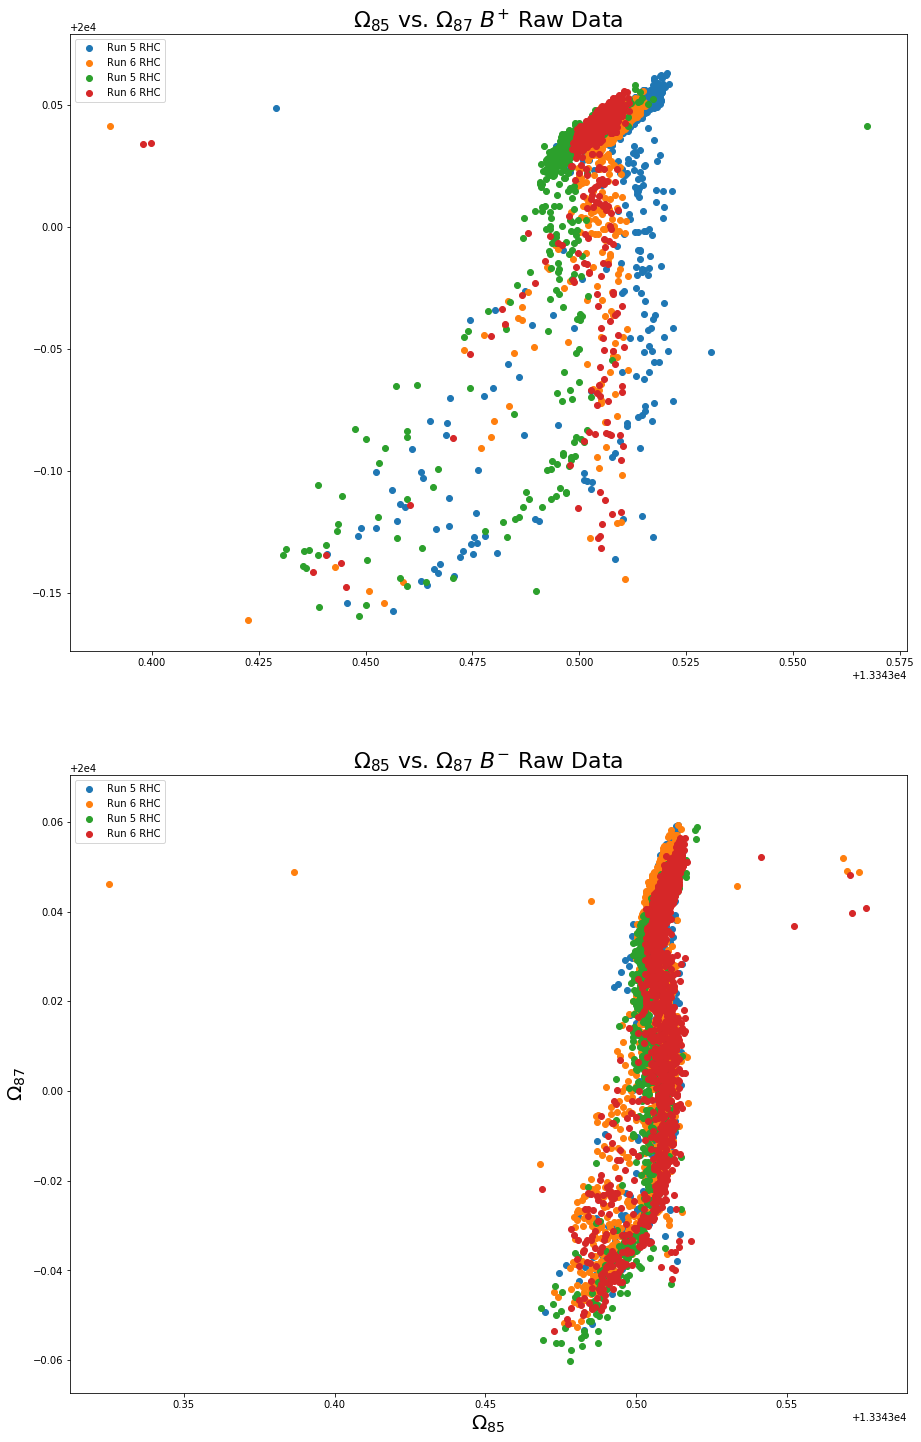

In [64]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (15,25))

### Visualizes Runs 5 and 6 for positive B-field ###
ax1.scatter(raw_pos_RHC_DF_G_Two['Run 5']['Omega85'], raw_pos_RHC_DF_G_Two['Run 5']['Omega87'], label = 'Run 5 RHC')
ax1.scatter(raw_pos_RHC_DF_G_Two['Run 6']['Omega85'], raw_pos_RHC_DF_G_Two['Run 6']['Omega87'], label = 'Run 6 RHC')

ax1.scatter(raw_pos_LHC_DF_G_Two['Run 5']['Omega85'], raw_pos_LHC_DF_G_Two['Run 5']['Omega87'], label = 'Run 5 RHC')
ax1.scatter(raw_pos_LHC_DF_G_Two['Run 6']['Omega85'], raw_pos_LHC_DF_G_Two['Run 6']['Omega87'], label = 'Run 6 RHC')



### Visualizes Runs 5 and 6 for negative B-field ###
ax2.scatter(raw_neg_RHC_DF_G_Two['Run 5']['Omega85'], raw_neg_RHC_DF_G_Two['Run 5']['Omega87'], label = 'Run 5 RHC')
ax2.scatter(raw_neg_RHC_DF_G_Two['Run 6']['Omega85'], raw_neg_RHC_DF_G_Two['Run 6']['Omega87'], label = 'Run 6 RHC')

ax2.scatter(raw_neg_LHC_DF_G_Two['Run 5']['Omega85'], raw_neg_LHC_DF_G_Two['Run 5']['Omega87'], label = 'Run 5 RHC')
ax2.scatter(raw_neg_LHC_DF_G_Two['Run 6']['Omega85'], raw_neg_LHC_DF_G_Two['Run 6']['Omega87'], label = 'Run 6 RHC')




ax1.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{+}$ Raw Data", size = 22)
plt.xlabel("$\Omega_{85}$", size = 20)
plt.ylabel("$\Omega_{87}$", size = 20)
ax1.legend(loc = 'upper left')




ax2.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{-}$ Raw Data", size = 22)
plt.xlabel("$\Omega_{85}$", size = 20)
plt.ylabel("$\Omega_{87}$", size = 20)
ax2.legend(loc = 'upper left')

plt.savefig("G_Two Fig 1.pdf")

We will perform a Regression analysis on the Group 2 dataset. But we first need to prepare the data for Linear Regression, thus we can apply the same algorithms for the preprocessing.

In [65]:
## This block of code will be used for generating a dataframe that will store all of omega 85 & 87 values
## of neg_RHC into one giant dataframe


## Initializes the first dataframe to be merged
temp = pd.concat([raw_neg_RHC_DF_G_Two['Run 5']['Omega85'], raw_neg_RHC_DF_G_Two['Run 5']['Omega87']], axis = 1, ignore_index = True)


for line in ['Run 6']:
    
    temp_merge = pd.concat([raw_neg_RHC_DF_G_Two[line]['Omega85'], raw_neg_RHC_DF_G_Two[line]['Omega87']], axis = 1, ignore_index = True)
    
    temp = pd.concat([temp, temp_merge], ignore_index = True)
    
    
neg_RHC_result = temp

In [66]:
## This block of code will be used for generating a dataframe that will store all of omega 85 & 87 values
## of neg_LHC into one giant dataframe

## Initializes the first dataframe to be merged
temp = pd.concat([raw_neg_LHC_DF_G_Two['Run 5']['Omega85'], raw_neg_LHC_DF_G_Two['Run 5']['Omega87']], axis = 1, ignore_index = True)


for line in ['Run 6']:
    
    temp_merge = pd.concat([raw_neg_LHC_DF_G_Two[line]['Omega85'], raw_neg_LHC_DF_G_Two[line]['Omega87']], axis = 1, ignore_index = True)
    
    temp = pd.concat([temp, temp_merge], ignore_index = True)
    
    
neg_LHC_result = temp

In [67]:
## This block of code will be used for generating a dataframe that will store all of omega 85 & 87 values
## of pos_LHC into one giant dataframe


## Initializes the first dataframe to be merged
temp = pd.concat([raw_pos_RHC_DF_G_Two['Run 5']['Omega85'], raw_pos_RHC_DF_G_Two['Run 5']['Omega87']], axis = 1, ignore_index = True)


for line in ['Run 6']:
    
    temp_merge = pd.concat([raw_pos_RHC_DF_G_Two[line]['Omega85'], raw_pos_RHC_DF_G_Two[line]['Omega87']], axis = 1, ignore_index = True)
    
    temp = pd.concat([temp, temp_merge], ignore_index = True)
    
    
pos_RHC_result = temp

In [68]:
## This block of code will be used for generating a dataframe that will store all of omega 85 & 87 values
## of neg_LHC into one giant dataframe

## Initializes the first dataframe to be merged
temp = pd.concat([raw_pos_LHC_DF_G_Two['Run 5']['Omega85'], raw_pos_LHC_DF_G_Two['Run 5']['Omega87']], axis = 1, ignore_index = True)


for line in ['Run 6']:
    
    temp_merge = pd.concat([raw_pos_LHC_DF_G_Two[line]['Omega85'], raw_pos_LHC_DF_G_Two[line]['Omega87']], axis = 1, ignore_index = True)
    
    temp = pd.concat([temp, temp_merge], ignore_index = True)
    
    
pos_LHC_result = temp

In [69]:
## This merges all of the dataframes above
regress = pd.concat([pos_RHC_result, pos_LHC_result, neg_RHC_result, neg_LHC_result], ignore_index = True)

In [70]:
## Creates a new dataframe that merges a vector of ones used for regression analysis
X = pd.concat([pd.DataFrame(np.ones(len(regress), dtype = float)), regress],axis = 1, ignore_index = True)

In [71]:
## Renames the columns of the data
X.columns = ['Ones', 'Omega85', 'Omega87']

In [72]:
X.head(10)

,Ones,Omega85,Omega87
0,1.0,13343.515450,20000.051820
1,1.0,13343.514488,20000.047873
2,1.0,13343.516846,20000.054106
3,1.0,13343.516018,20000.054044
4,1.0,13343.510498,20000.041331
5,1.0,13343.485785,19999.938658
6,1.0,13343.513449,20000.013435
7,1.0,13343.511160,20000.047241
8,1.0,13343.514826,20000.047959
9,1.0,13343.515428,20000.046819


This section again, as above, will perform the Linear Regression Analysis

In [73]:
line_regress_list = [] 

## Creating the Linear Regression model
lm = LinearRegression()

## Creating a list that will store the data
slopes = []
y_ints = []
mse = []
r_sqr = []

## Creating a loop that will iterate 1000 times
## This loop will be used to perform linear regression 1000 times
for index in range(1000):
    
    ## Splitting the test and train data
    X_train, X_test, Y_train, Y_test = train_test_split(X[['Ones','Omega85']], X['Omega87'], test_size = 0.30, random_state = 101)
    
    ## Fitting the data to the linear regression model
    lm.fit(X_train, Y_train)
    
    ## Calls the regression model and predicts the values 
    predicts = lm.predict(X_test)
    
    ## Saves all of the metrics of the linear regression
    slopes.append(lm.coef_[1])
    y_ints.append(lm.intercept_)
    mse.append(metrics.mean_squared_error(Y_test, predicts))
    r_sqr.append(metrics.r2_score(Y_test, predicts))

In [74]:
np.mean(slopes)

1.9436199030801122

In [75]:
np.mean(y_ints)

-5934.6751393737213

In [76]:
np.mean(mse)

0.00063592249757530813

In [77]:
np.mean(r_sqr)

0.31352369585514767

In [78]:
## Creates the linear model for Group 2
g = lambda x: np.mean(slopes) * x + np.mean(y_ints)

In [79]:
## Calculates the standard deviation of the residuals 
## As requested by Dr. Kimball
sigs = np.std(X['Omega85'].apply(f) - X['Omega87'])

In [80]:
## Recalculates the new model with the lower bound standard deviation
g = lambda x: np.mean(slopes) * x + np.mean(y_ints) - sigs

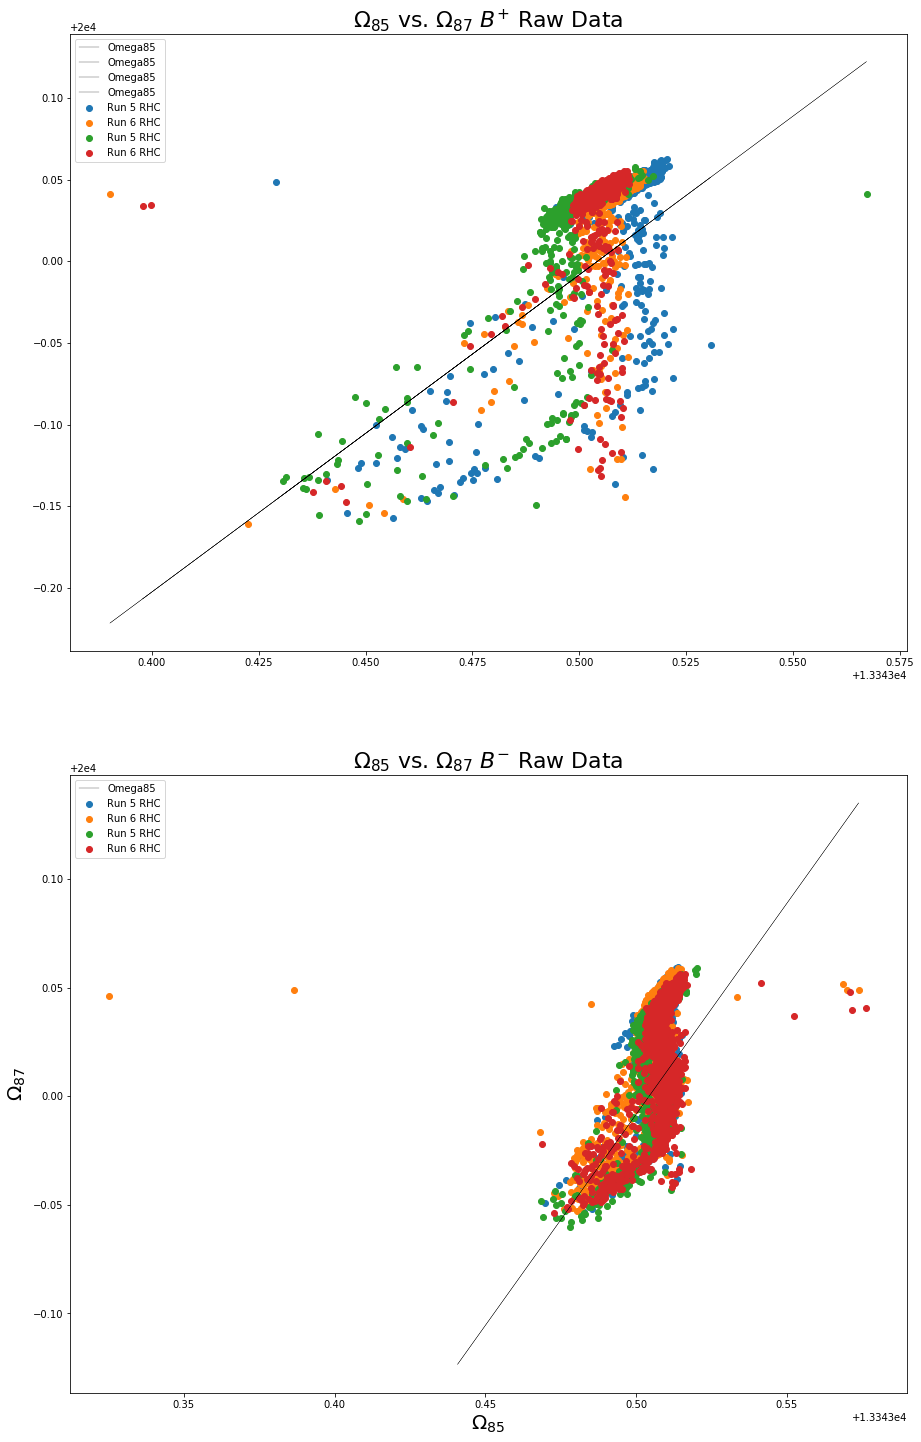

In [81]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (15,25))

### Visualizes Runs 5 and 6 for positive B-field ###
ax1.scatter(raw_pos_RHC_DF_G_Two['Run 5']['Omega85'], raw_pos_RHC_DF_G_Two['Run 5']['Omega87'], label = 'Run 5 RHC')
ax1.scatter(raw_pos_RHC_DF_G_Two['Run 6']['Omega85'], raw_pos_RHC_DF_G_Two['Run 6']['Omega87'], label = 'Run 6 RHC')

ax1.scatter(raw_pos_LHC_DF_G_Two['Run 5']['Omega85'], raw_pos_LHC_DF_G_Two['Run 5']['Omega87'], label = 'Run 5 RHC')
ax1.scatter(raw_pos_LHC_DF_G_Two['Run 6']['Omega85'], raw_pos_LHC_DF_G_Two['Run 6']['Omega87'], label = 'Run 6 RHC')



ax1.plot(raw_pos_RHC_DF_G_Two['Run 5']['Omega85'], g(raw_pos_RHC_DF_G_Two['Run 5']['Omega85']), color = 'black', linewidth = 0.3)
ax1.plot(raw_pos_RHC_DF_G_Two['Run 6']['Omega85'], g(raw_pos_RHC_DF_G_Two['Run 6']['Omega85']), color = 'black', linewidth = 0.3)
ax1.plot(raw_pos_LHC_DF_G_Two['Run 5']['Omega85'], g(raw_pos_LHC_DF_G_Two['Run 5']['Omega85']), color = 'black', linewidth = 0.3)
ax1.plot(raw_pos_LHC_DF_G_Two['Run 6']['Omega85'], g(raw_pos_LHC_DF_G_Two['Run 6']['Omega85']), color = 'black', linewidth = 0.3)






### Visualizes Runs 5 and 6 for negative B-field ###
ax2.scatter(raw_neg_RHC_DF_G_Two['Run 5']['Omega85'], raw_neg_RHC_DF_G_Two['Run 5']['Omega87'], label = 'Run 5 RHC')
ax2.scatter(raw_neg_RHC_DF_G_Two['Run 6']['Omega85'], raw_neg_RHC_DF_G_Two['Run 6']['Omega87'], label = 'Run 6 RHC')

ax2.scatter(raw_neg_LHC_DF_G_Two['Run 5']['Omega85'], raw_neg_LHC_DF_G_Two['Run 5']['Omega87'], label = 'Run 5 RHC')
ax2.scatter(raw_neg_LHC_DF_G_Two['Run 6']['Omega85'], raw_neg_LHC_DF_G_Two['Run 6']['Omega87'], label = 'Run 6 RHC')


ax2.plot(X_test['Omega85'], g(X_test['Omega85']), color = 'black', linewidth = 0.3)





ax1.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{+}$ Raw Data", size = 22)
plt.xlabel("$\Omega_{85}$", size = 20)
plt.ylabel("$\Omega_{87}$", size = 20)
ax1.legend(loc = 'upper left')


ax2.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{-}$ Raw Data", size = 22)
plt.xlabel("$\Omega_{85}$", size = 20)
plt.ylabel("$\Omega_{87}$", size = 20)
ax2.legend(loc = 'upper left')


Again, as the previous analaysis we will use this Linear Regression model as a way to classify by using the residuals of the line with respect to each point.

In [82]:
## Creating a list of strings that contains the runs we are going to filter data from
filt_list = ['Run 5', 'Run 6']

In [83]:
## Creating a list that will store the measurements that are 'cleaned' from the linear regression model
neg_RHC_Cln_G_Two = []

## Creates a list of the measurements 
## NOTE: This list has the runs in accending order
for line in filt_list:
    neg_RHC_Cln_G_Two.append(raw_neg_RHC_DF_G_Two[line][raw_neg_RHC_DF_G_Two[line]['Omega87'] - raw_neg_RHC_DF_G_Two[line]['Omega85'].apply(g) >= 0].index)

In [84]:
## Creating a list that will store the measurements that are 'cleaned' from the linear regression model
neg_LHC_Cln_G_Two = []

## Creates a list of the measurements 
## NOTE: This list has the runs in accending order
for line in filt_list:
    neg_LHC_Cln_G_Two.append(raw_neg_LHC_DF_G_Two[line][(raw_neg_LHC_DF_G_Two[line]['Omega87'] - raw_neg_LHC_DF_G_Two[line]['Omega85'].apply(g)) >= 0].index)

In [85]:
## Creating a list that will store the measurements that are 'cleaned' from the linear regression model
pos_RHC_Cln_G_Two = []

## Creates a list of the measurements 
## NOTE: This list has the runs in accending order
for line in filt_list:
    pos_RHC_Cln_G_Two.append(raw_pos_RHC_DF_G_Two[line][(raw_pos_RHC_DF_G_Two[line]['Omega87'] - raw_pos_RHC_DF_G_Two[line]['Omega85'].apply(g)) >= 0].index)

In [86]:
## Creating a list that will store the measurements that are 'cleaned' from the linear regression model
pos_LHC_Cln_G_Two = []

## Creates a list of the measurements 
## NOTE: This list has the runs in accending order
for line in filt_list:
    pos_LHC_Cln_G_Two.append(raw_pos_LHC_DF_G_Two[line][(raw_pos_LHC_DF_G_Two[line]['Omega87'] - raw_pos_LHC_DF_G_Two[line]['Omega85'].apply(g)) >= 0].index)

### Percentage of Negative B Field Data Removed

In [87]:
## Negative RHC Run 5
(1 - (len(neg_RHC_Cln_G_Two[0]) / raw_neg_RHC_DF_G_Two['Run 5'].shape[0])) * 100

31.25

In [88]:
## Negative RHC Run 6
(1- (len(neg_RHC_Cln_G_Two[1]) / raw_neg_RHC_DF_G_Two['Run 6'].shape[0])) * 100

19.999999999999996

In [89]:
## Negative LHC Run 5
(1 - (len(neg_LHC_Cln_G_Two[0]) / raw_neg_LHC_DF_G_Two['Run 5'].shape[0])) * 100

29.6875

In [90]:
## Negative LHC Run 6
(1 - (len(neg_LHC_Cln_G_Two[1]) / raw_neg_LHC_DF_G_Two['Run 6'].shape[0])) * 100

22.76041666666667

### Percentage of Positive B Field Data Removed

In [91]:
## Positive RHC Run 5
(1 - (len(pos_RHC_Cln_G_Two[0]) / raw_pos_RHC_DF_G_Two['Run 5'].shape[0])) * 100

21.875

In [92]:
## Positive RHC Run 6
(1- (len(pos_RHC_Cln_G_Two[1]) / raw_pos_RHC_DF_G_Two['Run 6'].shape[0])) * 100

3.90625

In [93]:
## Positive LHC Run 5
(1 - (len(pos_LHC_Cln_G_Two[0]) / raw_pos_LHC_DF_G_Two['Run 5'].shape[0])) * 100

12.656250000000002

In [94]:
## Positive LHC Run 6
(1 - (len(pos_LHC_Cln_G_Two[1]) / raw_pos_LHC_DF_G_Two['Run 6'].shape[0])) * 100

3.6979166666666674

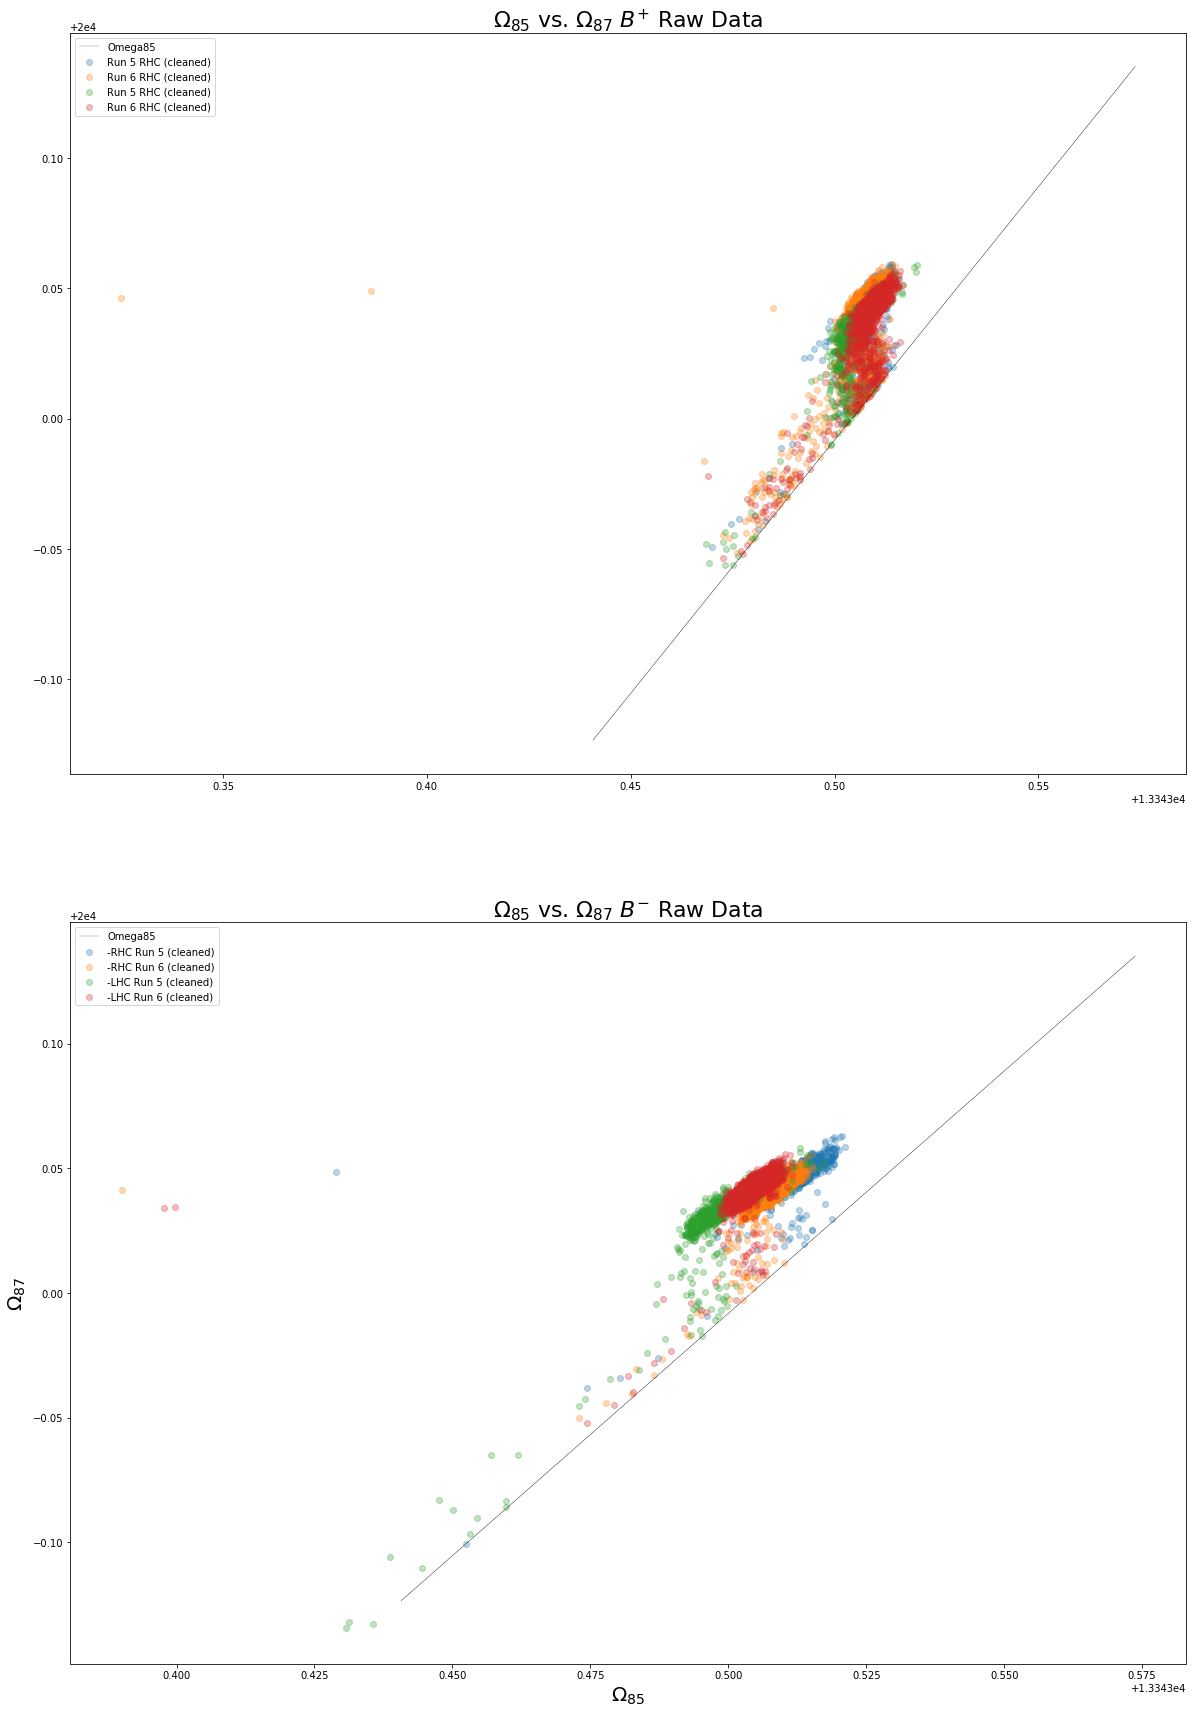

In [95]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (20,30))


## Plots the cleaned dataset for the negative B-field
ax1.scatter(raw_neg_RHC_DF_G_Two['Run 5']['Omega85'].iloc[neg_RHC_Cln_G_Two[0]], raw_neg_RHC_DF_G_Two['Run 5']['Omega87'].iloc[neg_RHC_Cln_G_Two[0]], alpha = 0.3, label = 'Run 5 RHC (cleaned)')
ax1.scatter(raw_neg_RHC_DF_G_Two['Run 6']['Omega85'].iloc[neg_RHC_Cln_G_Two[1]], raw_neg_RHC_DF_G_Two['Run 6']['Omega87'].iloc[neg_RHC_Cln_G_Two[1]], alpha = 0.3, label = 'Run 6 RHC (cleaned)')

ax1.scatter(raw_neg_LHC_DF_G_Two['Run 5']['Omega85'].iloc[neg_LHC_Cln_G_Two[0]], raw_neg_LHC_DF_G_Two['Run 5']['Omega87'].iloc[neg_LHC_Cln_G_Two[0]], alpha = 0.3, label = 'Run 5 RHC (cleaned)')
ax1.scatter(raw_neg_LHC_DF_G_Two['Run 6']['Omega85'].iloc[neg_LHC_Cln_G_Two[1]], raw_neg_LHC_DF_G_Two['Run 6']['Omega87'].iloc[neg_LHC_Cln_G_Two[1]], alpha = 0.3, label = 'Run 6 RHC (cleaned)')




ax1.plot(X_test['Omega85'], g(X_test['Omega85']), color = 'black',linewidth = 0.2)
########################################



## Plots the cleaned dataset for the positive B-field
ax2.scatter(raw_pos_RHC_DF_G_Two['Run 5']['Omega85'].iloc[pos_RHC_Cln_G_Two[0]], raw_pos_RHC_DF_G_Two['Run 5']['Omega87'].iloc[pos_RHC_Cln_G_Two[0]], alpha = 0.3, label = '-RHC Run 5 (cleaned)')
ax2.scatter(raw_pos_RHC_DF_G_Two['Run 6']['Omega85'].iloc[pos_RHC_Cln_G_Two[1]], raw_pos_RHC_DF_G_Two['Run 6']['Omega87'].iloc[pos_RHC_Cln_G_Two[1]], alpha = 0.3, label = '-RHC Run 6 (cleaned)')

ax2.scatter(raw_pos_LHC_DF_G_Two['Run 5']['Omega85'].iloc[pos_LHC_Cln_G_Two[0]], raw_pos_LHC_DF_G_Two['Run 5']['Omega87'].iloc[pos_LHC_Cln_G_Two[0]], alpha = 0.3, label = '-LHC Run 5 (cleaned)')
ax2.scatter(raw_pos_LHC_DF_G_Two['Run 6']['Omega85'].iloc[pos_LHC_Cln_G_Two[1]], raw_pos_LHC_DF_G_Two['Run 6']['Omega87'].iloc[pos_LHC_Cln_G_Two[1]], alpha = 0.3, label = '-LHC Run 6 (cleaned)')


## Plots the linear regression model
ax2.plot(X_test['Omega85'], g(X_test['Omega85']), color = 'black',linewidth = 0.2)

#############################################





ax1.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{+}$ Raw Data", size = 22)
plt.xlabel("$\Omega_{85}$", size = 20)
plt.ylabel("$\Omega_{87}$", size = 20)
ax1.legend(loc = 'upper left')


ax2.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{-}$ Raw Data", size = 22)
plt.xlabel("$\Omega_{85}$", size = 20)
plt.ylabel("$\Omega_{87}$", size = 20)
ax2.legend(loc = 'upper left')


As in the previous analysis, we will average out all of the values from the cleaned up dataset and then calculate the g-factor ratio.

In [96]:
neg_RHC_avg_ratios = [raw_neg_RHC_DF_G_Two['Run 5']['gyromagRatioRatio'].iloc[neg_RHC_Cln_G_Two[0]].mean()
                 ,raw_neg_RHC_DF_G_Two['Run 6']['gyromagRatioRatio'].iloc[neg_RHC_Cln_G_Two[1]].mean()]

neg_RHC_std_ratios = [raw_neg_RHC_DF_G_Two['Run 5']['gyromagRatioRatio'].iloc[neg_RHC_Cln_G_Two[0]].std()
                 ,raw_neg_RHC_DF_G_Two['Run 6']['gyromagRatioRatio'].iloc[neg_RHC_Cln_G_Two[1]].std()]

In [97]:
neg_LHC_avg_ratios = [raw_neg_LHC_DF_G_Two['Run 5']['gyromagRatioRatio'].iloc[neg_LHC_Cln_G_Two[0]].mean()
                 ,raw_neg_LHC_DF_G_Two['Run 6']['gyromagRatioRatio'].iloc[neg_LHC_Cln_G_Two[1]].mean()]

neg_LHC_std_ratios = [raw_neg_LHC_DF_G_Two['Run 5']['gyromagRatioRatio'].iloc[neg_LHC_Cln_G_Two[0]].std()
                 ,raw_neg_LHC_DF_G_Two['Run 6']['gyromagRatioRatio'].iloc[neg_LHC_Cln_G_Two[1]].std()]

In [98]:
pos_RHC_avg_ratios = [raw_pos_RHC_DF_G_Two['Run 5']['gyromagRatioRatio'].iloc[pos_RHC_Cln_G_Two[0]].mean()
                 ,raw_pos_RHC_DF_G_Two['Run 6']['gyromagRatioRatio'].iloc[pos_RHC_Cln_G_Two[1]].mean()]

pos_RHC_std_ratios = [raw_pos_RHC_DF_G_Two['Run 5']['gyromagRatioRatio'].iloc[pos_RHC_Cln_G_Two[0]].std()
                 ,raw_pos_RHC_DF_G_Two['Run 6']['gyromagRatioRatio'].iloc[pos_RHC_Cln_G_Two[1]].std()]

In [99]:
pos_LHC_avg_ratios = [raw_pos_LHC_DF_G_Two['Run 5']['gyromagRatioRatio'].iloc[pos_LHC_Cln_G_Two[0]].mean()
                 ,raw_pos_LHC_DF_G_Two['Run 6']['gyromagRatioRatio'].iloc[pos_LHC_Cln_G_Two[1]].mean()]

pos_LHC_std_ratios = [raw_pos_LHC_DF_G_Two['Run 5']['gyromagRatioRatio'].iloc[pos_LHC_Cln_G_Two[0]].std()
                 ,raw_pos_LHC_DF_G_Two['Run 6']['gyromagRatioRatio'].iloc[pos_LHC_Cln_G_Two[1]].std()]

In [100]:
means_G_Two = [np.mean(neg_RHC_avg_ratios), np.mean(pos_RHC_avg_ratios), np.mean(neg_LHC_avg_ratios), np.mean(pos_LHC_avg_ratios) ]

In [101]:
np.mean(means_G_Two)

1.4988591683114127

In [102]:
stds_G_Two = [np.mean(neg_RHC_std_ratios), np.mean(pos_RHC_std_ratios),np.mean(neg_LHC_std_ratios),np.mean(pos_LHC_std_ratios)  ]

In [103]:
np.sqrt(np.sum(np.power(stds_G_Two,2))) / 4

4.1247705148503647e-07

## Analayis 3
<br>
In the previous two analyis, we have shown that we can use a Linear Regerssion Model used for classifications by calcuating the residuals of the measurements with respect to the linear model. We will perform the same exact analyis for the Grou Three dataset, which consist of Runs 8 & 9. Since all the data is preprocessed (both runs 8 and 9 are in one dataframe) we can perform start with the linear regression analysis

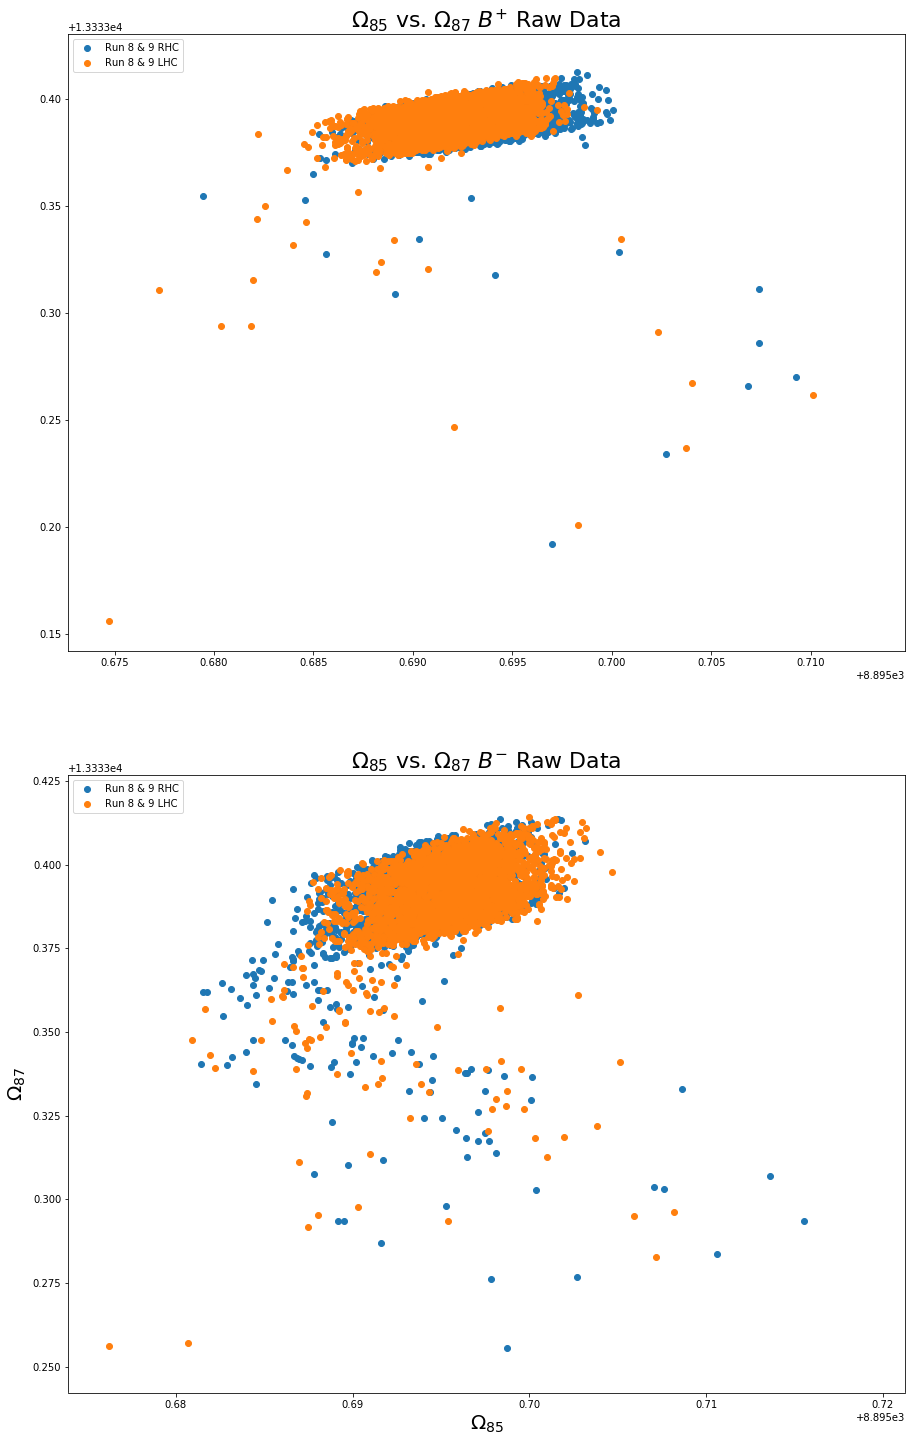

In [104]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (15,25))

### Visualizes Runs 5 and 6 for positive B-field ###
ax1.scatter(raw_pos_RHC_DF_G_Three['Run 8']['Omega85'], raw_pos_RHC_DF_G_Three['Run 8']['Omega87'], label = 'Run 8 & 9 RHC')
ax1.scatter(raw_pos_LHC_DF_G_Three['Run 8']['Omega85'], raw_pos_LHC_DF_G_Three['Run 8']['Omega87'], label = 'Run 8 & 9 LHC')



### Visualizes Runs 5 and 6 for negative B-field ###
ax2.scatter(raw_neg_RHC_DF_G_Three['Run 8']['Omega85'], raw_neg_RHC_DF_G_Three['Run 8']['Omega87'], label = 'Run 8 & 9 RHC')

ax2.scatter(raw_neg_LHC_DF_G_Three['Run 8']['Omega85'], raw_neg_LHC_DF_G_Three['Run 8']['Omega87'], label = 'Run 8 & 9 LHC')




ax1.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{+}$ Raw Data", size = 22)
plt.xlabel("$\Omega_{85}$", size = 20)
plt.ylabel("$\Omega_{87}$", size = 20)
ax1.legend(loc = 'upper left')




ax2.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{-}$ Raw Data", size = 22)
plt.xlabel("$\Omega_{85}$", size = 20)
plt.ylabel("$\Omega_{87}$", size = 20)
ax2.legend(loc = 'upper left')


In [105]:
## This block of code will be used for generating a dataframe that will store all of omega 85 & 87 values
## of neg_RHC into one giant dataframe


## Initializes the first dataframe to be merged
neg_RHC_con = pd.concat([raw_neg_RHC_DF_G_Three['Run 8']['Omega85'], raw_neg_RHC_DF_G_Three['Run 8']['Omega87']], axis = 1, ignore_index = True)


In [106]:
## This block of code will be used for generating a dataframe that will store all of omega 85 & 87 values
## of neg_LHC into one giant dataframe

## Initializes the first dataframe to be merged
neg_LHC_con = pd.concat([raw_neg_LHC_DF_G_Three['Run 8']['Omega85'], raw_neg_LHC_DF_G_Three['Run 8']['Omega87']], axis = 1, ignore_index = True)
    

In [107]:
## This block of code will be used for generating a dataframe that will store all of omega 85 & 87 values
## of pos_LHC into one giant dataframe


## Initializes the first dataframe to be merged
pos_RHC_con = pd.concat([raw_pos_RHC_DF_G_Three['Run 8']['Omega85'], raw_pos_RHC_DF_G_Three['Run 8']['Omega87']], axis = 1, ignore_index = True)

In [108]:
## This block of code will be used for generating a dataframe that will store all of omega 85 & 87 values
## of neg_LHC into one giant dataframe

## Initializes the first dataframe to be merged
pos_LHC_con = pd.concat([raw_pos_LHC_DF_G_Three['Run 8']['Omega85'], raw_pos_LHC_DF_G_Three['Run 8']['Omega87']], axis = 1, ignore_index = True)

In [109]:
## This merges all of the dataframes above
regress = pd.concat([pos_RHC_con, pos_LHC_con, neg_RHC_con, neg_LHC_con], ignore_index = True)

In [110]:
## Creates a new dataframe that merges a vector of ones used for regression analysis
X = pd.concat([pd.DataFrame(np.ones(len(regress), dtype = float)), regress],axis = 1, ignore_index = True)

In [111]:
## Renames the columns of the data
X.columns = ['Ones', 'Omega85', 'Omega87']

In [112]:
X.shape

(10240, 3)

### Linear Regression

In [113]:
line_regress_list = [] 

## Creating the Linear Regression model
lm = LinearRegression()

## Creating a list that will store the data
slopes = []
y_ints = []
mse = []
r_sqr = []

## Creating a loop that will iterate 1000 times
## This loop will be used to perform linear regression 1000 times
for index in range(1000):
    
    ## Splitting the test and train data
    X_train, X_test, Y_train, Y_test = train_test_split(X[['Ones','Omega85']], X['Omega87'], test_size = 0.30, random_state = 101)
    
    ## Fitting the data to the linear regression model
    lm.fit(X_train, Y_train)
    
    ## Calls the regression model and predicts the values 
    predicts = lm.predict(X_test)
    
    ## Saves all of the metrics of the linear regression
    slopes.append(lm.coef_[1])
    y_ints.append(lm.intercept_)
    mse.append(metrics.mean_squared_error(Y_test, predicts))
    r_sqr.append(metrics.r2_score(Y_test, predicts))

In [114]:
np.mean(slopes)

1.1326986251914091

In [115]:
np.mean(y_ints)

3257.2499634869673

In [116]:
np.mean(mse)

0.00014075980386006037

In [117]:
np.mean(r_sqr)

0.072138821559163638

In [118]:
## Creating the Linear Regression Model for Group 3
h = lambda x: np.mean(slopes) * x + np.mean(y_ints) 

In [119]:
## Calculates the standard deviation of the residuals 
## as requested by Dr. Kimball
sigs = np.std((X['Omega85'].apply(h) - X['Omega87']))

In [120]:
## Revaulates the new model with the correction
h = lambda x: np.mean(slopes) * x + np.mean(y_ints) - sigs

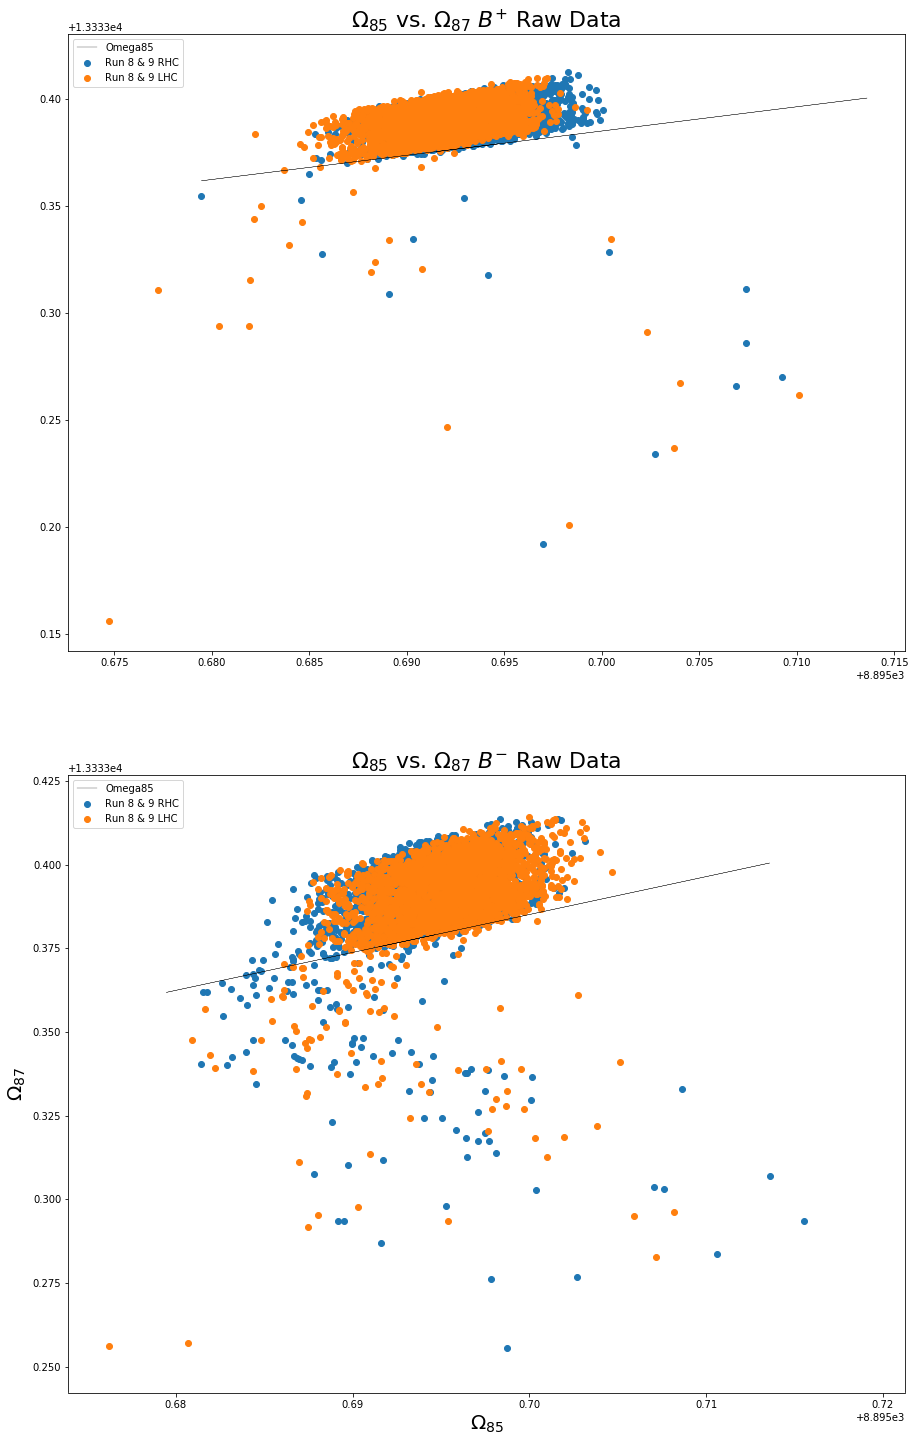

In [121]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (15,25))

### Visualizes Runs 5 and 6 for positive B-field ###
ax1.scatter(raw_pos_RHC_DF_G_Three['Run 8']['Omega85'], raw_pos_RHC_DF_G_Three['Run 8']['Omega87'], label = 'Run 8 & 9 RHC')
ax1.scatter(raw_pos_LHC_DF_G_Three['Run 8']['Omega85'], raw_pos_LHC_DF_G_Three['Run 8']['Omega87'], label = 'Run 8 & 9 LHC')

ax1.plot(X_test['Omega85'], h(X_test['Omega85']), color = 'black', linewidth = 0.3)

### Visualizes Runs 5 and 6 for negative B-field ###
ax2.scatter(raw_neg_RHC_DF_G_Three['Run 8']['Omega85'], raw_neg_RHC_DF_G_Three['Run 8']['Omega87'], label = 'Run 8 & 9 RHC')

ax2.scatter(raw_neg_LHC_DF_G_Three['Run 8']['Omega85'], raw_neg_LHC_DF_G_Three['Run 8']['Omega87'], label = 'Run 8 & 9 LHC')

ax2.plot(X_test['Omega85'], h(X_test['Omega85']), color = 'black', linewidth = 0.3)

ax1.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{+}$ Raw Data", size = 22)
plt.xlabel("$\Omega_{85}$", size = 20)
plt.ylabel("$\Omega_{87}$", size = 20)
ax1.legend(loc = 'upper left')




ax2.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{-}$ Raw Data", size = 22)
plt.xlabel("$\Omega_{85}$", size = 20)
plt.ylabel("$\Omega_{87}$", size = 20)
ax2.legend(loc = 'upper left')


In [122]:
neg_RHC_Cln_G_Three = []
neg_RHC_Cln_G_Three.append(raw_neg_RHC_DF_G_Three['Run 8'][raw_neg_RHC_DF_G_Three['Run 8']['Omega87'] - raw_neg_RHC_DF_G_Three['Run 8']['Omega85'].apply(h) >= 0].index)

In [123]:
neg_LHC_Cln_G_Three = []
neg_LHC_Cln_G_Three.append(raw_neg_LHC_DF_G_Three['Run 8'][raw_neg_LHC_DF_G_Three['Run 8']['Omega87'] - raw_neg_LHC_DF_G_Three['Run 8']['Omega85'].apply(h) >= 0].index)

In [124]:
pos_RHC_Cln_G_Three = []
pos_RHC_Cln_G_Three.append(raw_pos_RHC_DF_G_Three['Run 8'][raw_pos_RHC_DF_G_Three['Run 8']['Omega87'] - raw_pos_RHC_DF_G_Three['Run 8']['Omega85'].apply(h) >= 0].index)

In [125]:
pos_LHC_Cln_G_Three = []
pos_LHC_Cln_G_Three.append(raw_pos_LHC_DF_G_Three['Run 8'][raw_pos_LHC_DF_G_Three['Run 8']['Omega87'] - raw_pos_LHC_DF_G_Three['Run 8']['Omega85'].apply(h) >= 0].index)

### Percentage of Negative B Field Data Removed?

In [126]:
## Positive RHC Run 8
(1 - (len(neg_RHC_Cln_G_Three[0]) / raw_neg_RHC_DF_G_Three['Run 8'].shape[0])) * 100

5.117187499999998

In [127]:
## Positive RHC Run 8
(1 - (len(neg_LHC_Cln_G_Three[0]) / raw_neg_LHC_DF_G_Three['Run 8'].shape[0])) * 100

5.078125

### Percentage of Positive B Field Data Removed

In [128]:
## Positive RHC Run 5
(1 - (len(pos_RHC_Cln_G_Three[0]) / raw_pos_RHC_DF_G_Three['Run 8'].shape[0])) * 100

0.9765625

In [129]:
## Positive RHC Run 5
(1 - (len(pos_LHC_Cln_G_Three[0]) / raw_pos_LHC_DF_G_Three['Run 8'].shape[0])) * 100

1.0156249999999978

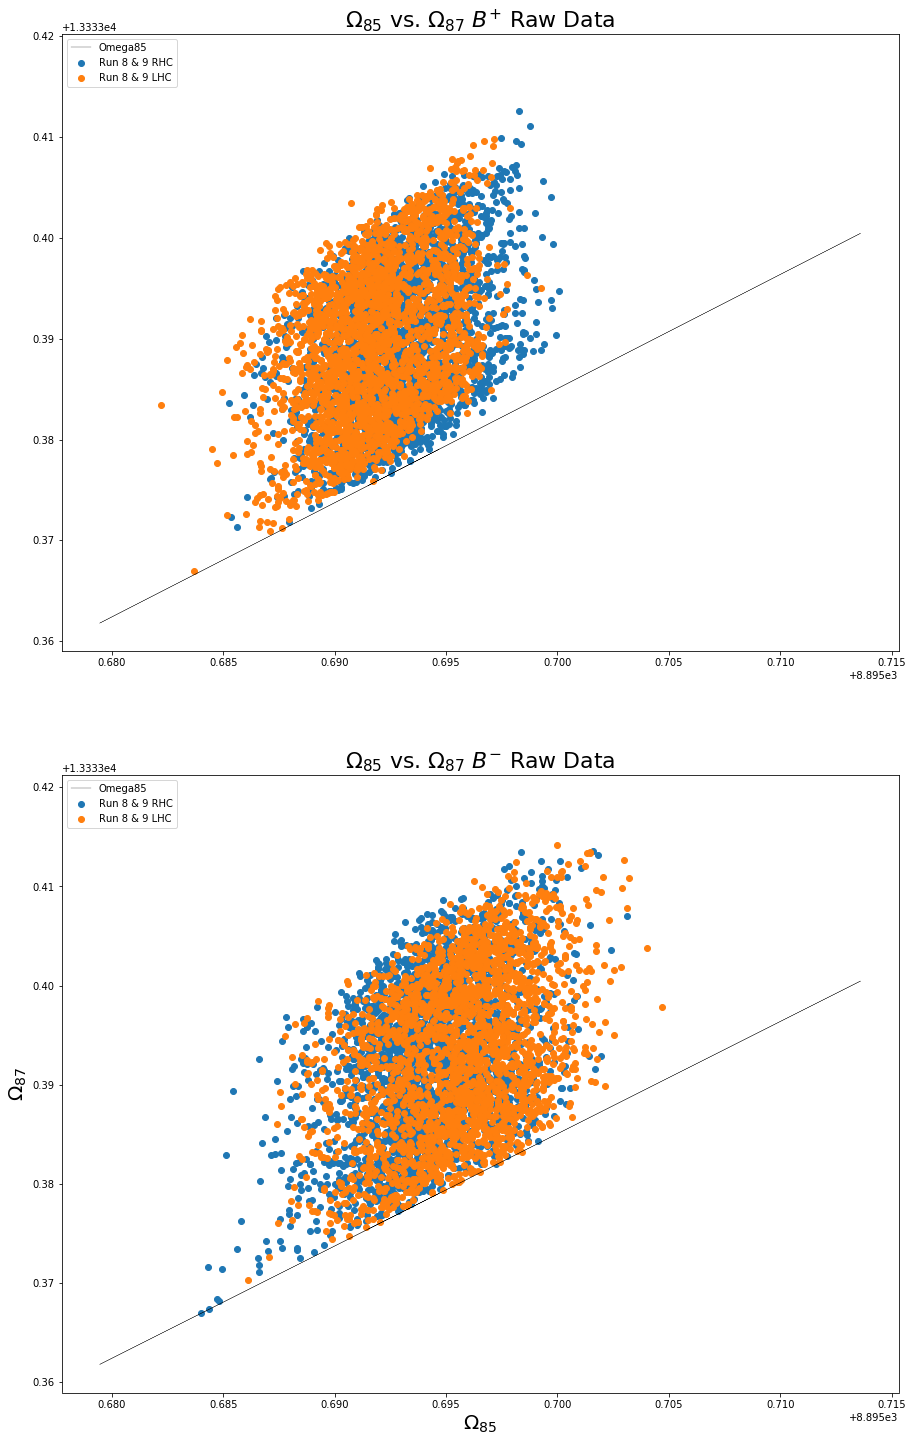

In [130]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (15,25))

### Visualizes Runs 5 and 6 for positive B-field ###
ax1.scatter(raw_pos_RHC_DF_G_Three['Run 8']['Omega85'].iloc[pos_RHC_Cln_G_Three[0]], raw_pos_RHC_DF_G_Three['Run 8']['Omega87'].iloc[pos_RHC_Cln_G_Three[0]], label = 'Run 8 & 9 RHC')
ax1.scatter(raw_pos_LHC_DF_G_Three['Run 8']['Omega85'].iloc[pos_LHC_Cln_G_Three[0]], raw_pos_LHC_DF_G_Three['Run 8']['Omega87'].iloc[pos_LHC_Cln_G_Three[0]], label = 'Run 8 & 9 LHC')

ax1.plot(X_test['Omega85'], h(X_test['Omega85']), color = 'black', linewidth = 0.3)

### Visualizes Runs 5 and 6 for negative B-field ###
ax2.scatter(raw_neg_RHC_DF_G_Three['Run 8']['Omega85'].iloc[neg_RHC_Cln_G_Three[0]], raw_neg_RHC_DF_G_Three['Run 8']['Omega87'].iloc[neg_RHC_Cln_G_Three[0]], label = 'Run 8 & 9 RHC')
ax2.scatter(raw_neg_LHC_DF_G_Three['Run 8']['Omega85'].iloc[neg_LHC_Cln_G_Three[0]], raw_neg_LHC_DF_G_Three['Run 8']['Omega87'].iloc[neg_LHC_Cln_G_Three[0]], label = 'Run 8 & 9 LHC')

ax2.plot(X_test['Omega85'], h(X_test['Omega85']), color = 'black', linewidth = 0.3)

ax1.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{+}$ Raw Data", size = 22)
plt.xlabel("$\Omega_{85}$", size = 20)
plt.ylabel("$\Omega_{87}$", size = 20)
ax1.legend(loc = 'upper left')




ax2.set_title("$\Omega_{85}$ vs. $\Omega_{87}$ $B^{-}$ Raw Data", size = 22)
plt.xlabel("$\Omega_{85}$", size = 20)
plt.ylabel("$\Omega_{87}$", size = 20)
ax2.legend(loc = 'upper left')


In [131]:
means_G_Three = [np.mean(raw_neg_RHC_DF_G_Three['Run 8']['gyromagRatioRatio'].iloc[neg_RHC_Cln_G_Three[0]]), 
         np.mean(raw_neg_LHC_DF_G_Three['Run 8']['gyromagRatioRatio'].iloc[neg_LHC_Cln_G_Three[0]]),
         np.mean(raw_pos_RHC_DF_G_Three['Run 8']['gyromagRatioRatio'].iloc[pos_RHC_Cln_G_Three[0]]),
         np.mean(raw_pos_LHC_DF_G_Three['Run 8']['gyromagRatioRatio'].iloc[pos_LHC_Cln_G_Three[0]])
        ]

In [132]:
np.mean(means_G_Three)

1.4988590842426655

In [133]:
stds_G_Three = [np.std(raw_neg_RHC_DF_G_Three['Run 8']['gyromagRatioRatio'].iloc[neg_RHC_Cln_G_Three[0]]), 
        np.std(raw_neg_LHC_DF_G_Three['Run 8']['gyromagRatioRatio'].iloc[neg_LHC_Cln_G_Three[0]]),
        np.std(raw_pos_RHC_DF_G_Three['Run 8']['gyromagRatioRatio'].iloc[pos_RHC_Cln_G_Three[0]]),
        np.std(raw_pos_LHC_DF_G_Three['Run 8']['gyromagRatioRatio'].iloc[pos_LHC_Cln_G_Three[0]])
        ]

In [134]:
np.sqrt(np.sum(np.power(stds_G_Three,2))) / 4

3.9400446264288725e-07

## $$\sqrt{\Sigma_{i}^{n}\sigma_{i}^{2}}$$

Now that we have the mean g-factor values (and their respective standard deviations) of each group (runs respectively per group), we can use this for calculations.

### Current values with no boundaries 

In [135]:
[1.4988584997528949, 1.4988594542954385, 1.4988596930842817]


[1.4988584997528949, 1.4988594542954385, 1.4988596930842817]

In [136]:
a_std = [1.602259838375715e-07, 2.1517108113544718e-07, 2.2520100715005615e-07]

([<matplotlib.axis.XTick at 0x1a0e1bafd0>,
 <a list of 4 Text xticklabel objects>)

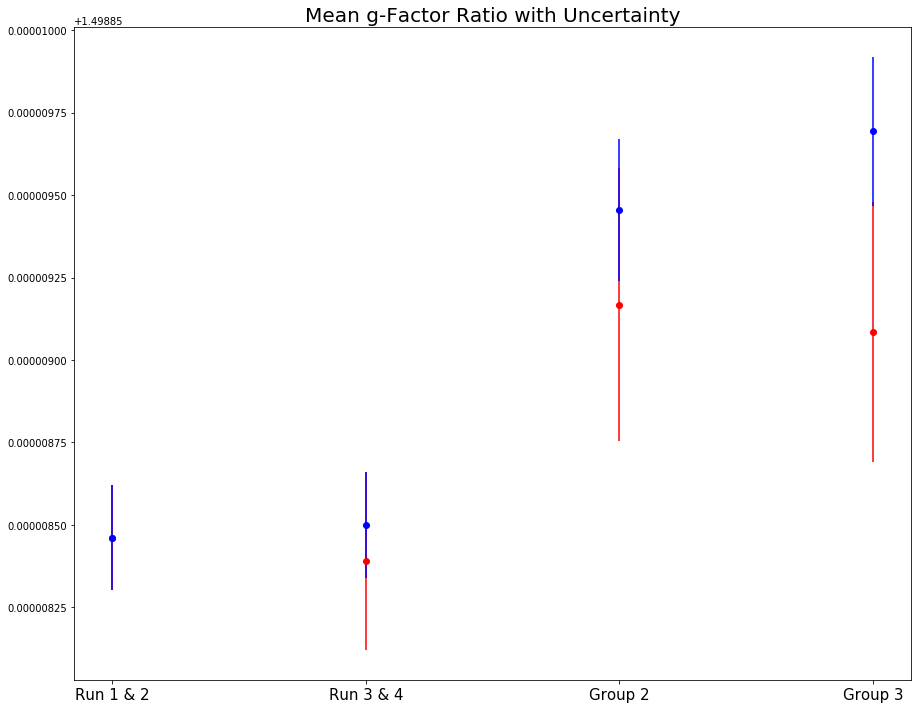

In [137]:
plt.figure(figsize = (15,12))
plt.errorbar([0,1,2,3], [np.mean(means_G_One_one), np.mean(means_G_One_two), np.mean(means_G_Two), np.mean(means_G_Three)], yerr = [np.sqrt(np.sum(np.power(stds_G_One_one,2))) / 4, np.sqrt(np.sum(np.power(stds_G_One_two,2))) / 4, np.sqrt(np.sum(np.power(stds_G_Two,2))) / 4, np.sqrt(np.sum(np.power(stds_G_Three,2))) / 4], fmt = 'o', color = 'red')
plt.errorbar([0,1,2,3], [np.mean(means_G_One_one),1.4988584997528949, 1.4988594542954385, 1.4988596930842817], yerr = [ np.sqrt(np.sum(np.power(stds_G_One_one,2))) / 4,1.6036524724226798e-07, 2.1517108113544718e-07, 2.2520100715005615e-07], fmt = 'o', color = 'blue')


plt.title("Mean g-Factor Ratio with Uncertainty", size = 20)
plt.xticks([0,1,2,3], ['Run 1 & 2','Run 3 & 4', 'Group 2', 'Group 3'], size = 15)


### Values with the correction (lowered line by sigma)

In [138]:
[np.mean(means_G_One_one), np.mean(means_G_One_two), np.mean(means_G_Two), np.mean(means_G_Three)]

[1.4988584617047582,
 1.4988583904363479,
 1.4988591683114127,
 1.4988590842426655]

In [139]:
[np.sqrt(np.sum(np.power(stds_G_One_one,2))) / 4, np.sqrt(np.sum(np.power(stds_G_One_two,2))) / 4, np.sqrt(np.sum(np.power(stds_G_Two,2))) / 4, np.sqrt(np.sum(np.power(stds_G_Three,2))) / 4]

[1.6016463935480796e-07,
 2.7003811131741822e-07,
 4.1247705148503647e-07,
 3.9400446264288725e-07]

### Values without the correction to the line (no sigma)

In [140]:
[np.mean(means_G_One_one),1.4988584997528949, 1.4988594542954385, 1.4988596930842817]

[1.4988584617047582,
 1.4988584997528949,
 1.4988594542954385,
 1.4988596930842817]

In [141]:
[ np.sqrt(np.sum(np.power(stds_G_One_one,2))) / 4,1.6036524724226798e-07, 2.1517108113544718e-07, 2.2520100715005615e-07]

[1.6016463935480796e-07,
 1.6036524724226798e-07,
 2.1517108113544718e-07,
 2.2520100715005615e-07]